In [ ]:
# default_exp gbe.wm.reliability

# Working memory task - Reliability

<div>
    <p align="left"><img src="images/wm_task.png" width = '200px'> 

    
   
    
</div>

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%reload_ext rpy2.ipython
import seaborn as sns
from trr265 import plotting
from matplotlib import pyplot as plt
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", font_scale = 1.3, rc=custom_params)

In [ ]:
#export
%load_ext autoreload
%autoreload 2
from trr265.gbe.wm.data_provider import WMDataProvider
import trr265.gbe.wm.scoring as wm_scoring 
import trr265.stats as stats
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the data
In this notebook, all tests and examples are run on the initial baseline dataset.

In [ ]:
# Getting raw data
dp = WMDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_wm_data()
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
df = df.query("is_initial and is_baseline")
# Filtering participants with old app
df = dp.filter_old_app_sessions(df)
df = dp.filter_level_two_failures(df)

8 participants used an old version of the task in some of their sessions.  13 sessions (2.49%) were removed from the dataset.
6 sessions (1.18%) were removed because participants failed a level two trial.


## Test-retest reliability

### Based on maximum WMC level

#### No distractor (long)

R[write to console]: Loading required package: psych

R[write to console]: boundary (singular) fit: see ?isSingular



type    ICC      F    df1    df2    p  lower bound  \
Single_raters_absolute    ICC1  0.279  1.776  231.0  232.0  0.0        0.177   
Single_random_raters      ICC2  0.279  1.776  231.0  231.0  0.0        0.177   
Single_fixed_raters       ICC3  0.279  1.776  231.0  231.0  0.0        0.177   
Average_raters_absolute  ICC1k  0.437  1.776  231.0  232.0  0.0        0.301   
Average_random_raters    ICC2k  0.437  1.776  231.0  231.0  0.0        0.301   
Average_fixed_raters     ICC3k  0.437  1.776  231.0  231.0  0.0        0.300   

                         upper bound     description  
Single_raters_absolute         0.376  .28 (.18, .38)  
Single_random_raters           0.376  .28 (.18, .38)  
Single_fixed_raters            0.376  .28 (.18, .38)  
Average_raters_absolute        0.547  .44 (.30, .55)  
Average_random_raters          0.547  .44 (.30, .55)  
Average_fixed_raters           0.547  .44 (.30, .55)

variance  Percent
ID           0.307    0.279
Items        0.000    0.000
Residual     0.791    0.721
Total        1.098    1.000

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


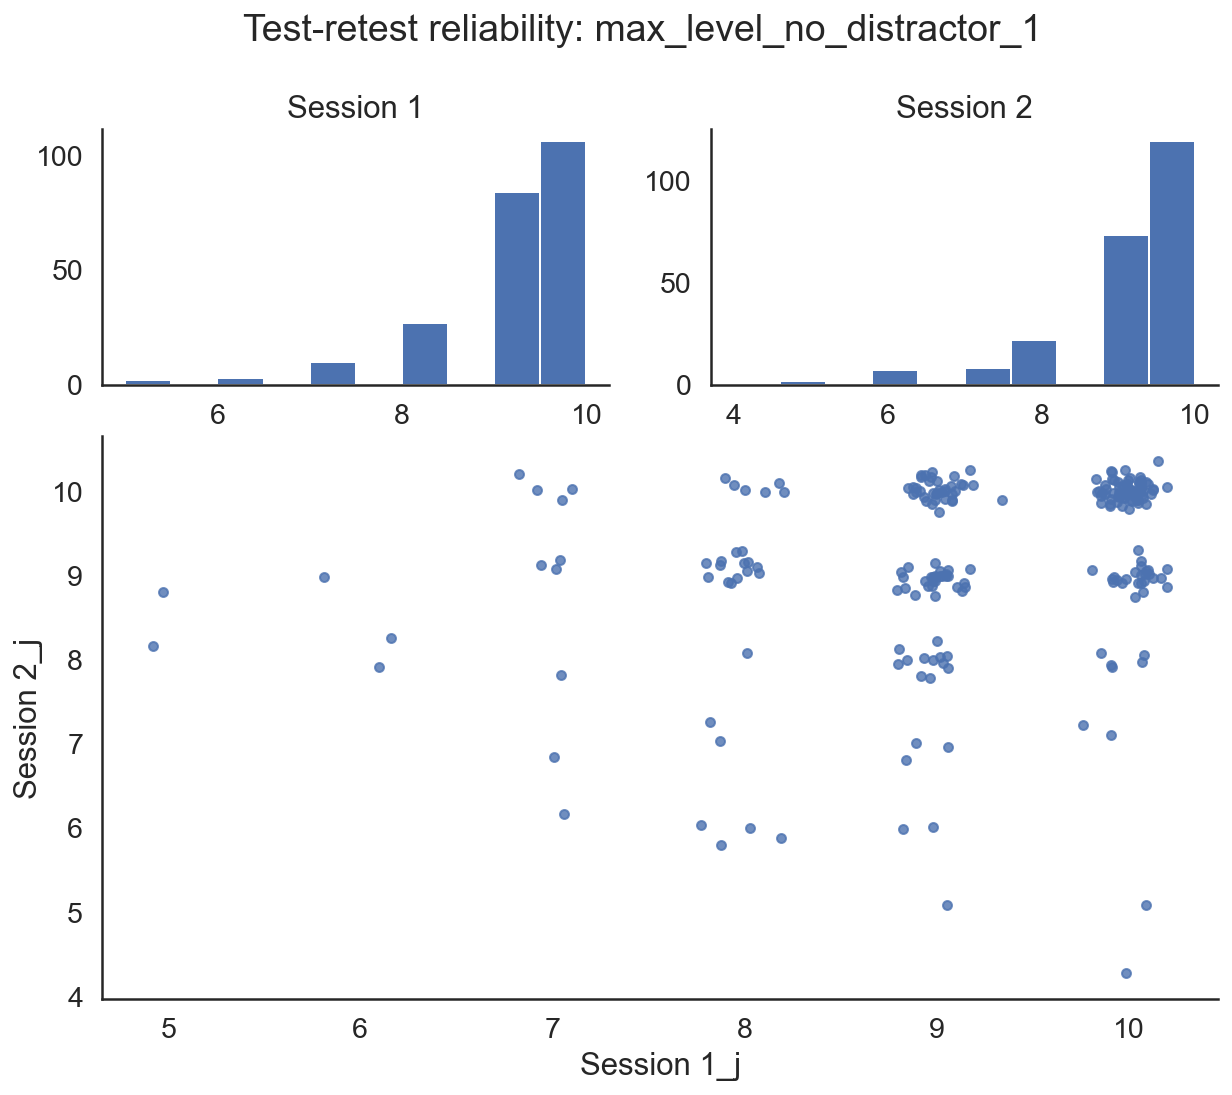

In [ ]:
_df = wm_scoring.get_max_levels(df)#['max_level_no_distractor_1']
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean_no_distractor_1 = stats.analyze_reliability(_df, dependent = 'max_level_no_distractor_1', add_jitter = True)

#### No distractor (short)

R[write to console]: boundary (singular) fit: see ?isSingular



type    ICC      F    df1    df2    p  lower bound  \
Single_raters_absolute    ICC1  0.451  2.642  231.0  232.0  0.0         0.36   
Single_random_raters      ICC2  0.451  2.642  231.0  231.0  0.0         0.36   
Single_fixed_raters       ICC3  0.451  2.642  231.0  231.0  0.0         0.36   
Average_raters_absolute  ICC1k  0.622  2.642  231.0  232.0  0.0         0.53   
Average_random_raters    ICC2k  0.622  2.642  231.0  231.0  0.0         0.53   
Average_fixed_raters     ICC3k  0.622  2.642  231.0  231.0  0.0         0.53   

                         upper bound     description  
Single_raters_absolute         0.533  .45 (.36, .53)  
Single_random_raters           0.533  .45 (.36, .53)  
Single_fixed_raters            0.533  .45 (.36, .53)  
Average_raters_absolute        0.695  .62 (.53, .70)  
Average_random_raters          0.695  .62 (.53, .70)  
Average_fixed_raters           0.695  .62 (.53, .70)

variance  Percent
ID           0.621    0.451
Items        0.000    0.000
Residual     0.756    0.549
Total        1.378    1.000

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


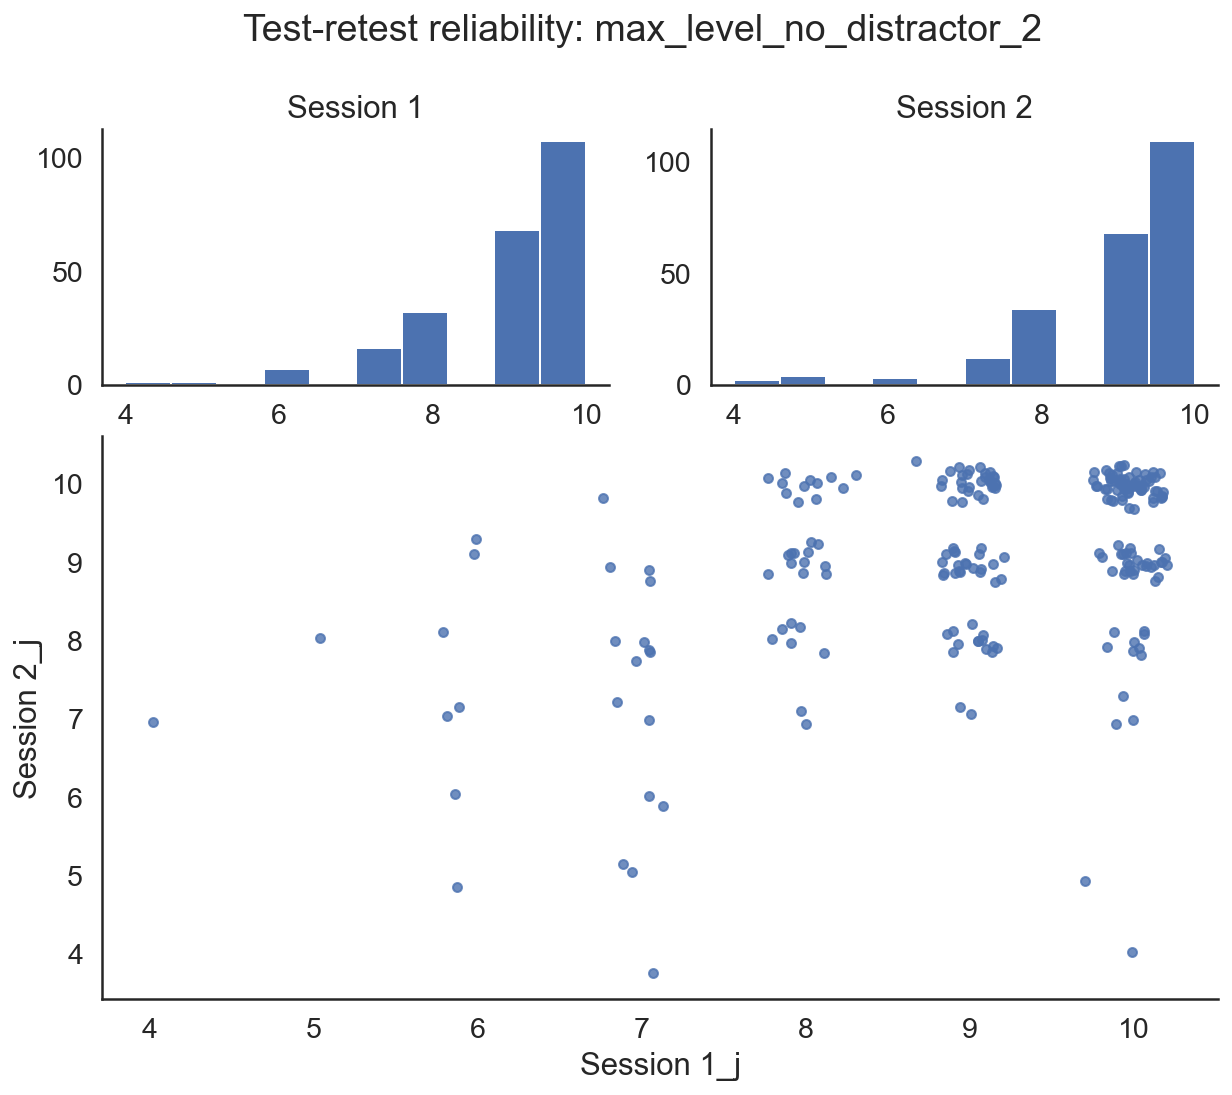

In [ ]:
_df = wm_scoring.get_max_levels(df)#['max_level_no_distractor_1']
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean_no_distractor_2 = stats.analyze_reliability(_df, dependent = 'max_level_no_distractor_2', add_jitter = True)

#### Encoding distractor

type    ICC      F    df1    df2    p  lower bound  \
Single_raters_absolute    ICC1  0.382  2.236  231.0  232.0  0.0        0.286   
Single_random_raters      ICC2  0.384  2.264  231.0  231.0  0.0        0.289   
Single_fixed_raters       ICC3  0.387  2.264  231.0  231.0  0.0        0.292   
Average_raters_absolute  ICC1k  0.553  2.236  231.0  232.0  0.0        0.444   
Average_random_raters    ICC2k  0.555  2.264  231.0  231.0  0.0        0.448   
Average_fixed_raters     ICC3k  0.558  2.264  231.0  231.0  0.0        0.451   

                         upper bound     description  
Single_raters_absolute         0.470  .38 (.29, .47)  
Single_random_raters           0.472  .38 (.29, .47)  
Single_fixed_raters            0.475  .39 (.29, .48)  
Average_raters_absolute        0.640  .55 (.44, .64)  
Average_random_raters          0.642  .56 (.45, .64)  
Average_fixed_raters           0.645  .56 (.45, .64)

variance  Percent
ID           0.572    0.384
Items        0.012    0.008
Residual     0.904    0.608
Total        1.488    1.000

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


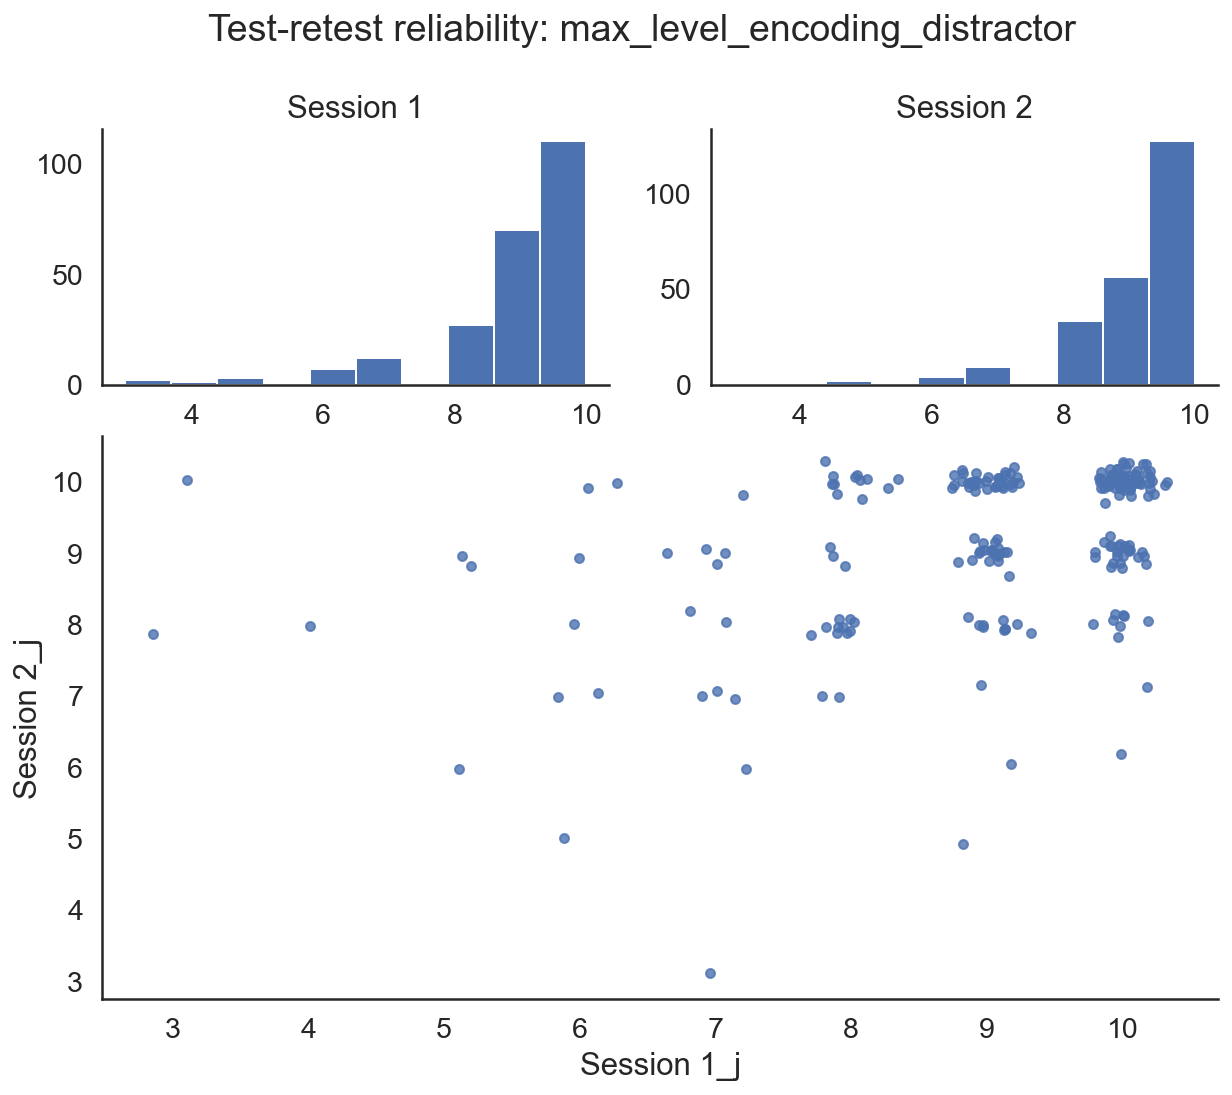

In [ ]:
_df = wm_scoring.get_max_levels(df)#['max_level_no_distractor_1']
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean_encoding_distractor = stats.analyze_reliability(_df, dependent = 'max_level_encoding_distractor', add_jitter = True)

#### Delayed distractor

type    ICC      F    df1    df2    p  lower bound  \
Single_raters_absolute    ICC1  0.383  2.241  231.0  232.0  0.0        0.287   
Single_random_raters      ICC2  0.389  2.322  231.0  231.0  0.0        0.294   
Single_fixed_raters       ICC3  0.398  2.322  231.0  231.0  0.0        0.303   
Average_raters_absolute  ICC1k  0.554  2.241  231.0  232.0  0.0        0.446   
Average_random_raters    ICC2k  0.561  2.322  231.0  231.0  0.0        0.454   
Average_fixed_raters     ICC3k  0.569  2.322  231.0  231.0  0.0        0.465   

                         upper bound     description  
Single_raters_absolute         0.471  .38 (.29, .47)  
Single_random_raters           0.478  .39 (.29, .48)  
Single_fixed_raters            0.485  .40 (.30, .49)  
Average_raters_absolute        0.641  .55 (.45, .64)  
Average_random_raters          0.646  .56 (.45, .65)  
Average_fixed_raters           0.653  .57 (.47, .65)

variance  Percent
ID           0.725    0.389
Items        0.040    0.021
Residual     1.096    0.589
Total        1.860    1.000

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


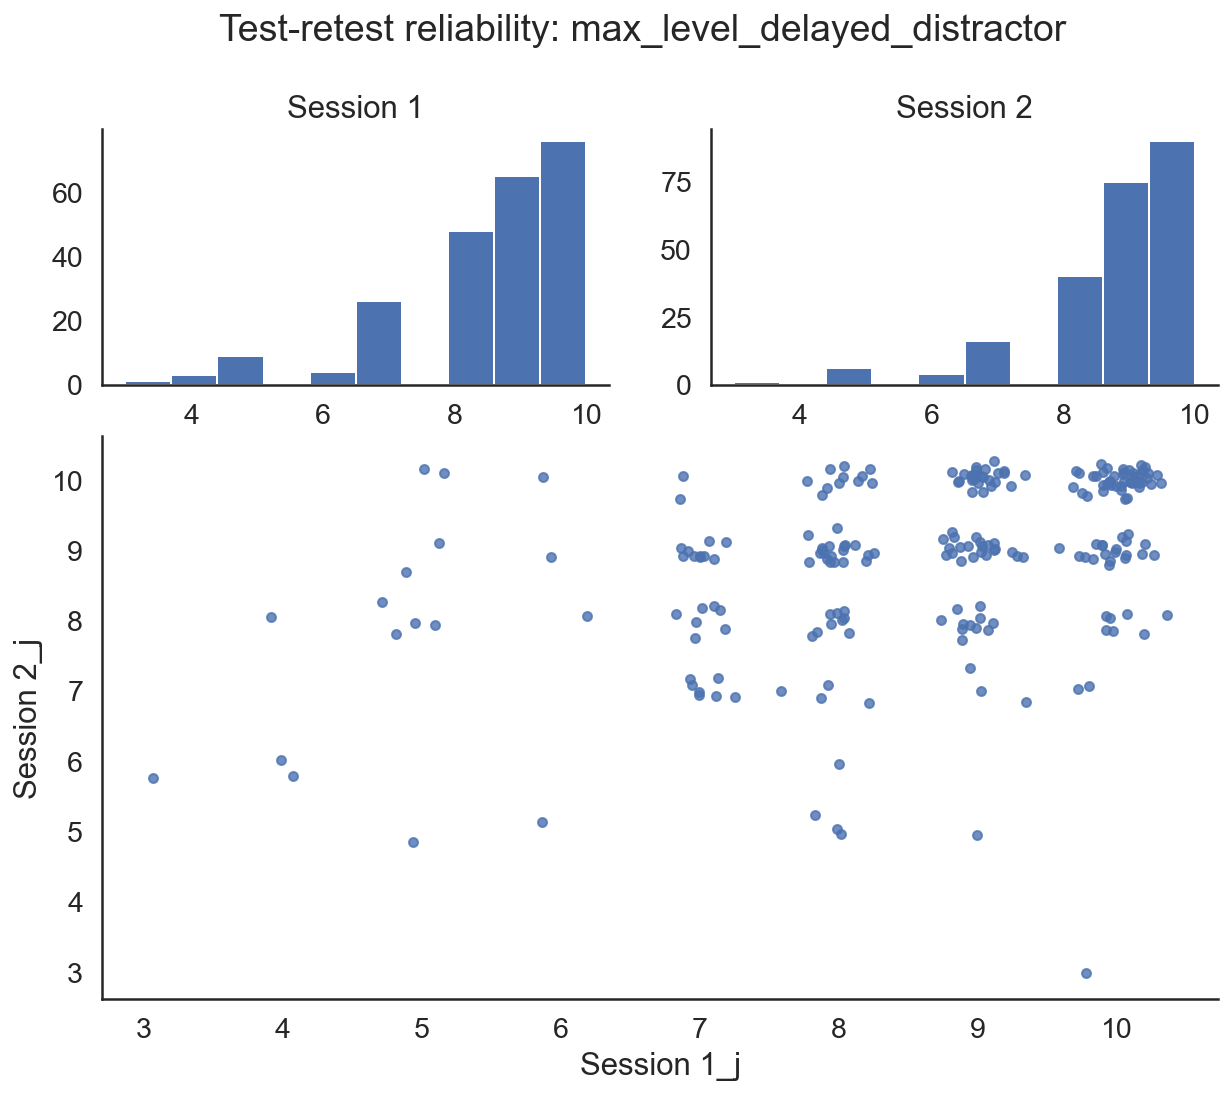

In [ ]:
_df = wm_scoring.get_max_levels(df)#['max_level_no_distractor_1']
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean_delayed_distractor = stats.analyze_reliability(_df, dependent = 'max_level_delayed_distractor', add_jitter = True)

### Based on predicted values (separate models)

#### No distractor (long)

In [ ]:
_df = wm_scoring.get_perc_correct_predicted_sep(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')

R[write to console]: Loading required package: lme4

R[write to console]: Loading required package: Matrix

R[write to console]: 
Attaching package: ‘lmerTest’


R[write to console]: The following object is masked from ‘package:lme4’:

    lmer


R[write to console]: The following object is masked from ‘package:stats’:

    step




R[write to console]: boundary (singular) fit: see ?isSingular



type    ICC      F    df1    df2    p  lower bound  \
Single_raters_absolute    ICC1  0.299  1.851  231.0  232.0  0.0        0.197   
Single_random_raters      ICC2  0.299  1.851  231.0  231.0  0.0        0.197   
Single_fixed_raters       ICC3  0.299  1.851  231.0  231.0  0.0        0.197   
Average_raters_absolute  ICC1k  0.460  1.851  231.0  232.0  0.0        0.329   
Average_random_raters    ICC2k  0.460  1.851  231.0  231.0  0.0        0.329   
Average_fixed_raters     ICC3k  0.460  1.851  231.0  231.0  0.0        0.329   

                         upper bound     description  
Single_raters_absolute         0.394  .30 (.20, .39)  
Single_random_raters           0.394  .30 (.20, .39)  
Single_fixed_raters            0.394  .30 (.20, .39)  
Average_raters_absolute        0.565  .46 (.33, .57)  
Average_random_raters          0.565  .46 (.33, .57)  
Average_fixed_raters           0.565  .46 (.33, .57)

variance  Percent
ID           0.005    0.299
Items        0.000    0.000
Residual     0.011    0.701
Total        0.015    1.000

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


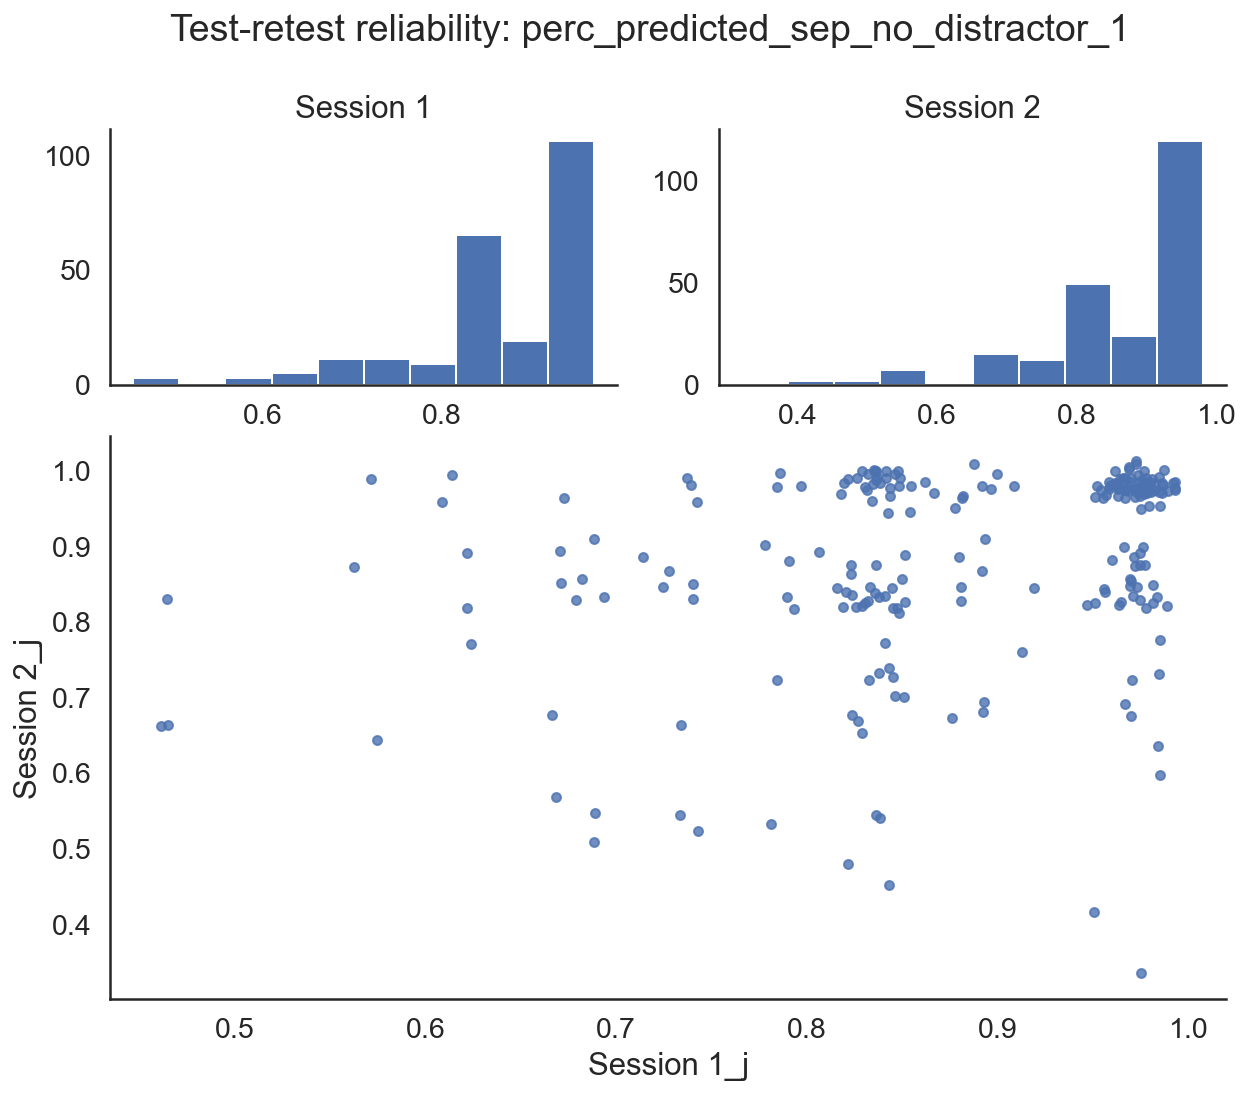

In [ ]:
iccs_perc_predicted_sep_no_distractor_1 = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_no_distractor_1', add_jitter = True)

#### No distractor (short)

R[write to console]: boundary (singular) fit: see ?isSingular



type    ICC     F    df1    df2    p  lower bound  \
Single_raters_absolute    ICC1  0.451  2.64  231.0  232.0  0.0         0.36   
Single_random_raters      ICC2  0.451  2.64  231.0  231.0  0.0         0.36   
Single_fixed_raters       ICC3  0.451  2.64  231.0  231.0  0.0         0.36   
Average_raters_absolute  ICC1k  0.621  2.64  231.0  232.0  0.0         0.53   
Average_random_raters    ICC2k  0.621  2.64  231.0  231.0  0.0         0.53   
Average_fixed_raters     ICC3k  0.621  2.64  231.0  231.0  0.0         0.53   

                         upper bound     description  
Single_raters_absolute         0.533  .45 (.36, .53)  
Single_random_raters           0.533  .45 (.36, .53)  
Single_fixed_raters            0.533  .45 (.36, .53)  
Average_raters_absolute        0.695  .62 (.53, .70)  
Average_random_raters          0.695  .62 (.53, .70)  
Average_fixed_raters           0.695  .62 (.53, .70)

variance  Percent
ID           0.009    0.451
Items        0.000    0.000
Residual     0.011    0.549
Total        0.020    1.000

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


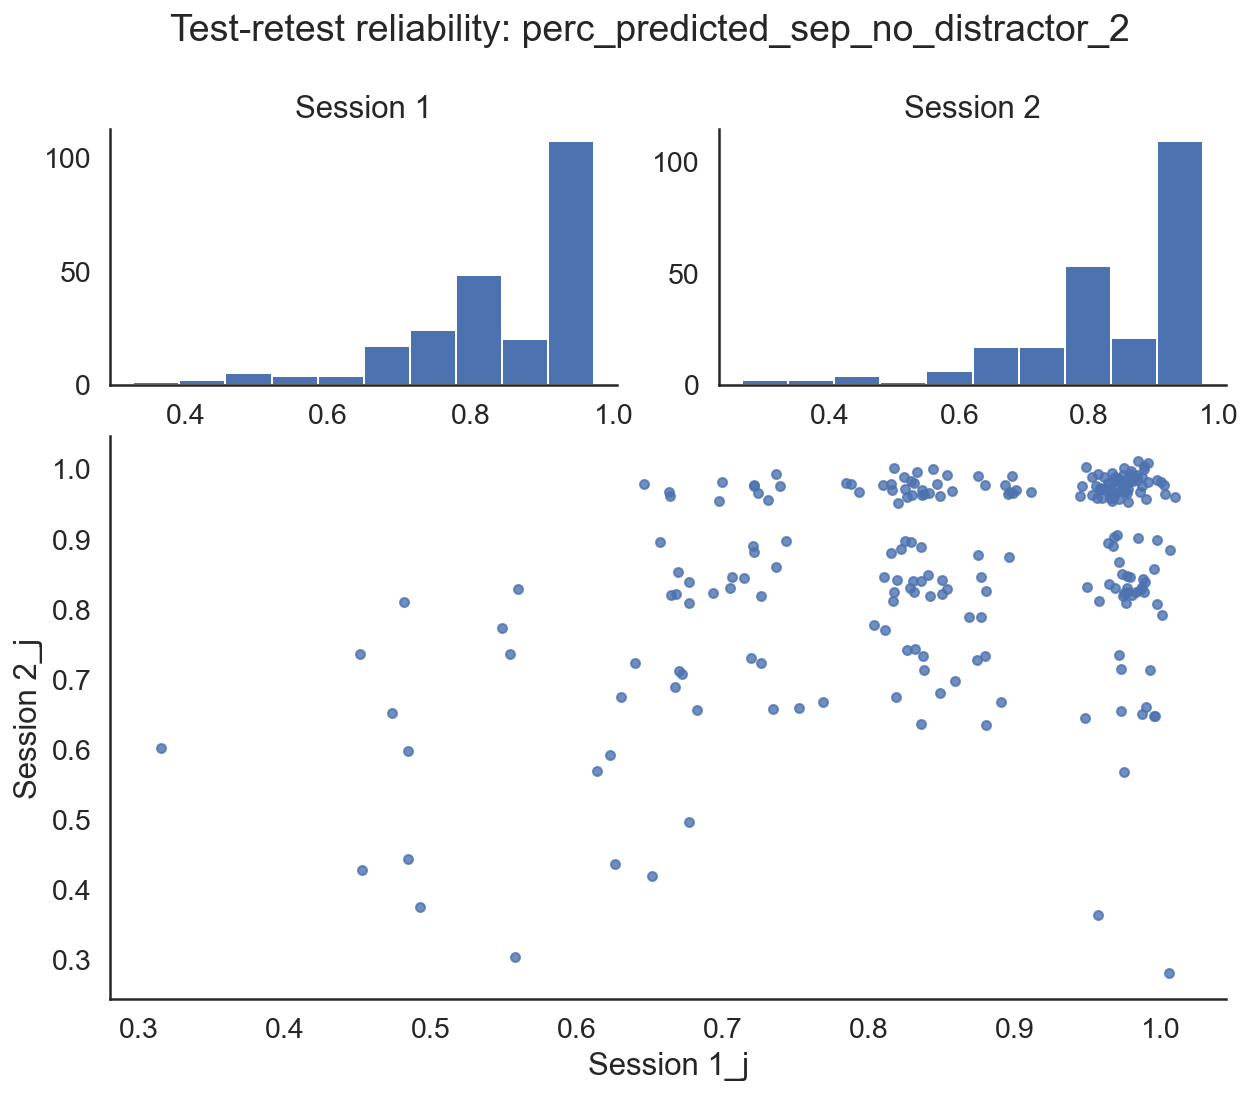

In [ ]:
iccs_perc_predicted_sep_no_distractor_2 = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_no_distractor_2', add_jitter = True)

#### Encoding distractor

type    ICC      F    df1    df2    p  lower bound  \
Single_raters_absolute    ICC1  0.389  2.276  231.0  232.0  0.0        0.294   
Single_random_raters      ICC2  0.393  2.320  231.0  231.0  0.0        0.298   
Single_fixed_raters       ICC3  0.398  2.320  231.0  231.0  0.0        0.303   
Average_raters_absolute  ICC1k  0.561  2.276  231.0  232.0  0.0        0.454   
Average_random_raters    ICC2k  0.564  2.320  231.0  231.0  0.0        0.459   
Average_fixed_raters     ICC3k  0.569  2.320  231.0  231.0  0.0        0.465   

                         upper bound     description  
Single_raters_absolute         0.477  .39 (.29, .48)  
Single_random_raters           0.480  .39 (.30, .48)  
Single_fixed_raters            0.485  .40 (.30, .48)  
Average_raters_absolute        0.646  .56 (.45, .65)  
Average_random_raters          0.649  .56 (.46, .65)  
Average_fixed_raters           0.653  .57 (.46, .65)

variance  Percent
ID           0.009    0.393
Items        0.000    0.012
Residual     0.013    0.595
Total        0.022    1.000

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


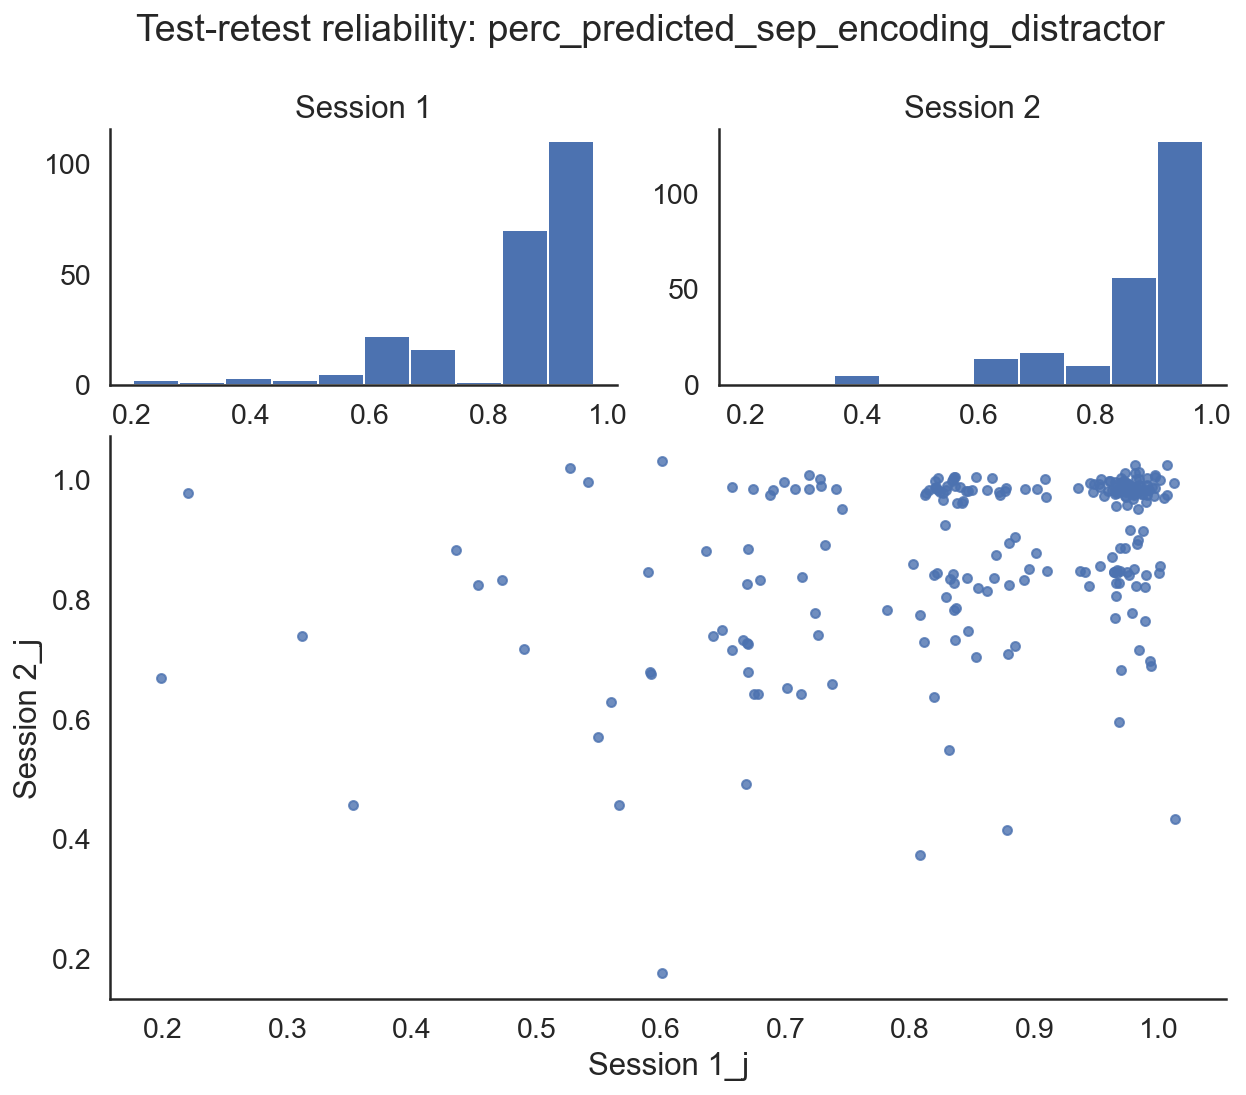

In [ ]:
perc_predicted_sep_encoding_distractor = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_encoding_distractor', add_jitter = True)

#### Delayed distractor

type    ICC      F    df1    df2    p  lower bound  \
Single_raters_absolute    ICC1  0.409  2.383  231.0  232.0  0.0        0.315   
Single_random_raters      ICC2  0.419  2.528  231.0  231.0  0.0        0.322   
Single_fixed_raters       ICC3  0.433  2.528  231.0  231.0  0.0        0.341   
Average_raters_absolute  ICC1k  0.580  2.383  231.0  232.0  0.0        0.479   
Average_random_raters    ICC2k  0.590  2.528  231.0  231.0  0.0        0.487   
Average_fixed_raters     ICC3k  0.604  2.528  231.0  231.0  0.0        0.509   

                         upper bound     description  
Single_raters_absolute         0.495  .41 (.31, .49)  
Single_random_raters           0.506  .42 (.32, .51)  
Single_fixed_raters            0.517  .43 (.34, .52)  
Average_raters_absolute        0.662  .58 (.48, .66)  
Average_random_raters          0.672  .59 (.49, .67)  
Average_fixed_raters           0.682  .60 (.51, .68)

variance  Percent
ID           0.010    0.419
Items        0.001    0.033
Residual     0.014    0.548
Total        0.025    1.000

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


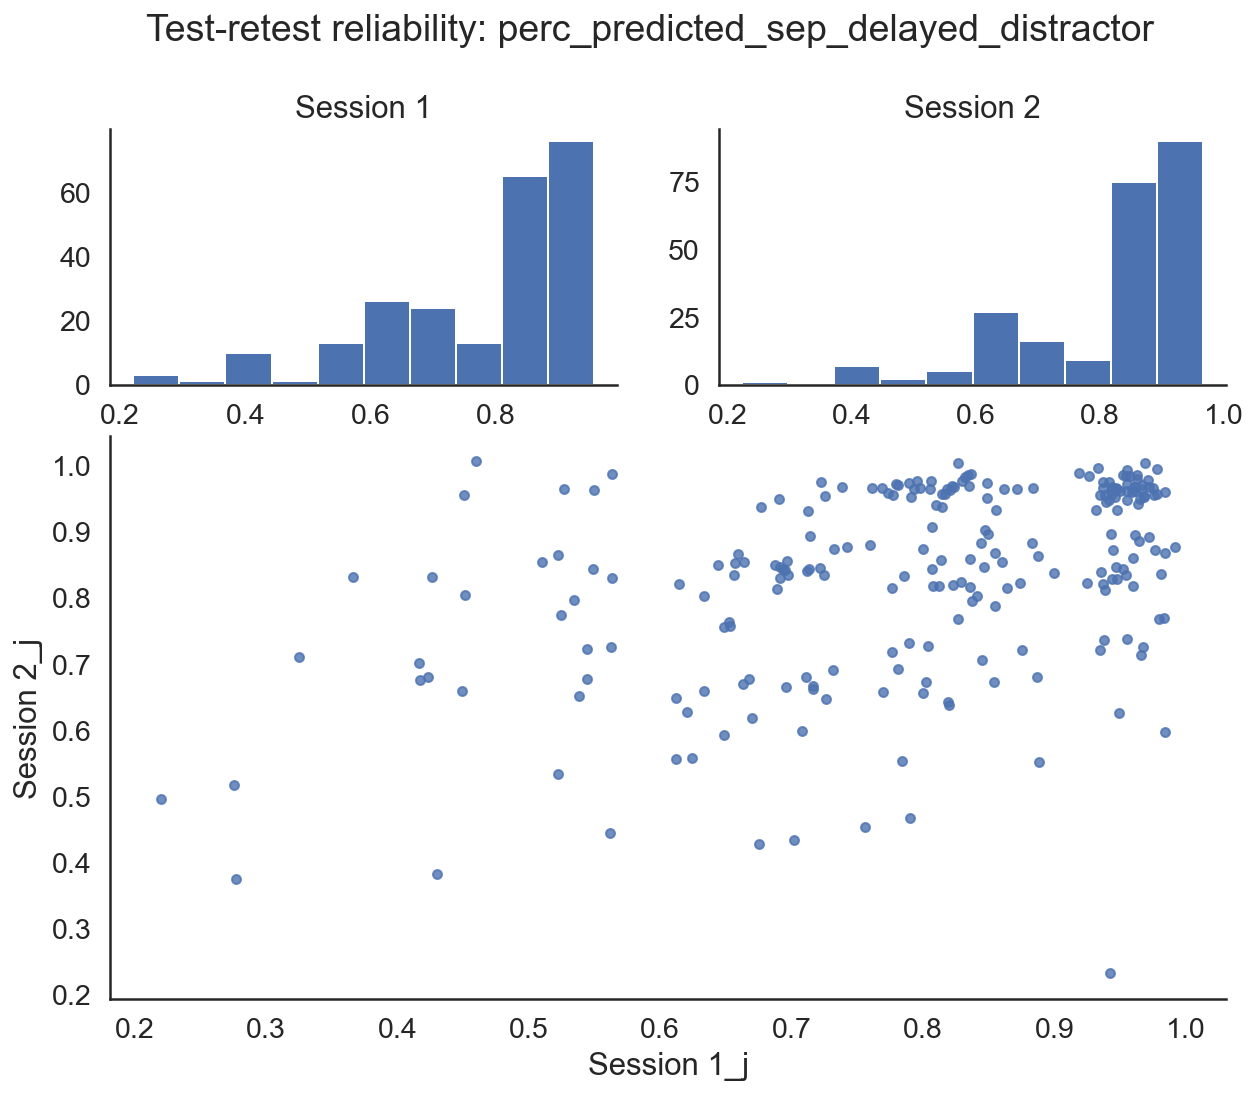

In [ ]:
perc_predicted_sep_delayed_distractor = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_delayed_distractor', add_jitter = True)

### Based on predicted values (joint model)

#### No distractor (long)

In [ ]:
_df, ms = wm_scoring.get_perc_correct_predicted_sep_trial(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')

R[write to console]: boundary (singular) fit: see ?isSingular



type    ICC      F    df1    df2    p  lower bound  \
Single_raters_absolute    ICC1  0.469  2.765  231.0  232.0  0.0        0.380   
Single_random_raters      ICC2  0.469  2.765  231.0  231.0  0.0        0.380   
Single_fixed_raters       ICC3  0.469  2.765  231.0  231.0  0.0        0.380   
Average_raters_absolute  ICC1k  0.638  2.765  231.0  232.0  0.0        0.551   
Average_random_raters    ICC2k  0.638  2.765  231.0  231.0  0.0        0.551   
Average_fixed_raters     ICC3k  0.638  2.765  231.0  231.0  0.0        0.551   

                         upper bound     description  
Single_raters_absolute         0.549  .47 (.38, .55)  
Single_random_raters           0.549  .47 (.38, .55)  
Single_fixed_raters            0.549  .47 (.38, .55)  
Average_raters_absolute        0.709  .64 (.55, .71)  
Average_random_raters          0.709  .64 (.55, .71)  
Average_fixed_raters           0.709  .64 (.55, .71)

variance  Percent
ID           0.007    0.469
Items        0.000    0.000
Residual     0.008    0.531
Total        0.015    1.000

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


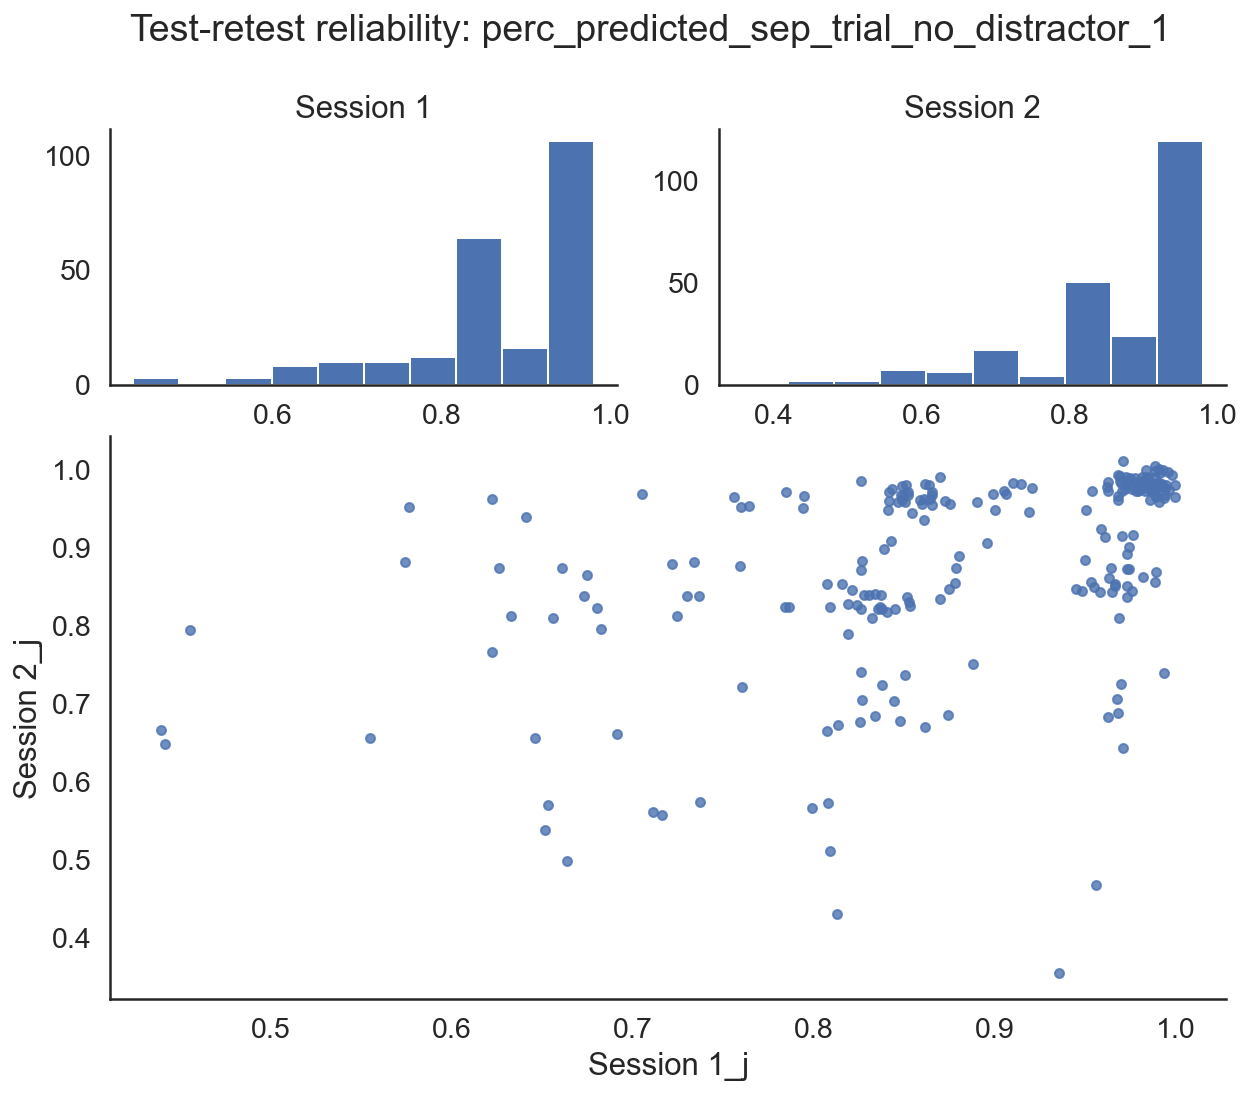

In [ ]:
iccs_perc_predicted_sep_trial_no_distractor_1 = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_trial_no_distractor_1', add_jitter = True)

In [ ]:
def get_model_calculated_icc(m):
    %R require(insight) -i m
    %R var_sess <- get_variance_intercept(m)[1]
    %R var_pp <- get_variance_intercept(m)[2]
    %R icc <- var_pp / (var_pp+(var_sess)) -o icc -o var_sess -o var_pp
    # Note that what get_variance_intercept outputs as session variance, we call residual, here
    variances = pd.DataFrame({"type":["Participant","Session","Residual"],"variance":[var_pp[0],0,var_sess[0]]})
    variances["Percent"] = variances.variance/variances.variance.sum()
    variances = {'iccs':[None, variances]}
    return {'icc':icc[0],'variances':variances}

iccs_perc_predicted_sep_trial_mod_no_distractor_1 = get_model_calculated_icc(ms['no_distractor_1'])
iccs_perc_predicted_sep_trial_mod_no_distractor_1['icc']

R[write to console]: Loading required package: insight



0.5162815496790297

#### No distractor (short)

type    ICC      F    df1    df2    p  lower bound  \
Single_raters_absolute    ICC1  0.601  4.016  231.0  232.0  0.0        0.528   
Single_random_raters      ICC2  0.601  4.016  231.0  231.0  0.0        0.528   
Single_fixed_raters       ICC3  0.601  4.016  231.0  231.0  0.0        0.528   
Average_raters_absolute  ICC1k  0.751  4.016  231.0  232.0  0.0        0.691   
Average_random_raters    ICC2k  0.751  4.016  231.0  231.0  0.0        0.691   
Average_fixed_raters     ICC3k  0.751  4.016  231.0  231.0  0.0        0.691   

                         upper bound     description  
Single_raters_absolute         0.666  .60 (.53, .67)  
Single_random_raters           0.666  .60 (.53, .67)  
Single_fixed_raters            0.666  .60 (.53, .67)  
Average_raters_absolute        0.800  .75 (.69, .80)  
Average_random_raters          0.800  .75 (.69, .80)  
Average_fixed_raters           0.800  .75 (.69, .80)

variance  Percent
ID           0.012    0.601
Items        0.000    0.000
Residual     0.008    0.399
Total        0.020    1.000

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


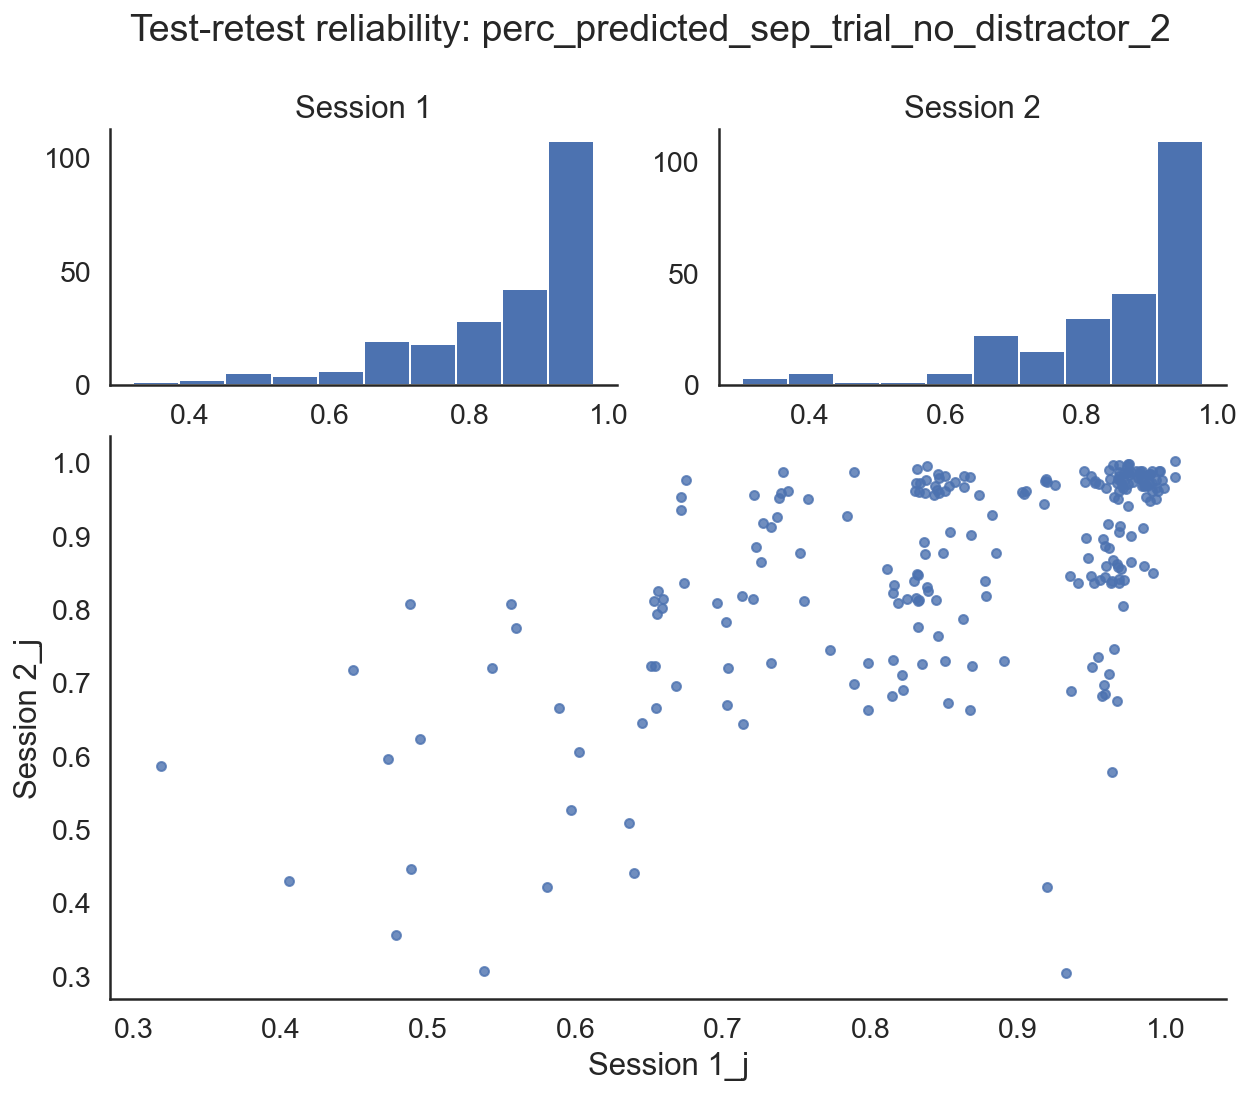

In [ ]:
iccs_perc_predicted_sep_trial_no_distractor_2 = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_trial_no_distractor_2', add_jitter = True)

In [ ]:
iccs_perc_predicted_sep_trial_mod_no_distractor_2 = get_model_calculated_icc(ms['no_distractor_2'])
iccs_perc_predicted_sep_trial_mod_no_distractor_2['icc']

0.540487829100631

#### Encoding distractor

type    ICC      F    df1    df2    p  lower bound  \
Single_raters_absolute    ICC1  0.506  3.052  231.0  232.0  0.0        0.422   
Single_random_raters      ICC2  0.508  3.089  231.0  231.0  0.0        0.423   
Single_fixed_raters       ICC3  0.511  3.089  231.0  231.0  0.0        0.426   
Average_raters_absolute  ICC1k  0.672  3.052  231.0  232.0  0.0        0.593   
Average_random_raters    ICC2k  0.674  3.089  231.0  231.0  0.0        0.595   
Average_fixed_raters     ICC3k  0.676  3.089  231.0  231.0  0.0        0.598   

                         upper bound     description  
Single_raters_absolute         0.582  .51 (.42, .58)  
Single_random_raters           0.584  .51 (.42, .58)  
Single_fixed_raters            0.586  .51 (.43, .59)  
Average_raters_absolute        0.736  .67 (.59, .74)  
Average_random_raters          0.737  .67 (.59, .74)  
Average_fixed_raters           0.739  .68 (.60, .74)

variance  Percent
ID           0.011    0.508
Items        0.000    0.006
Residual     0.011    0.486
Total        0.022    1.000

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


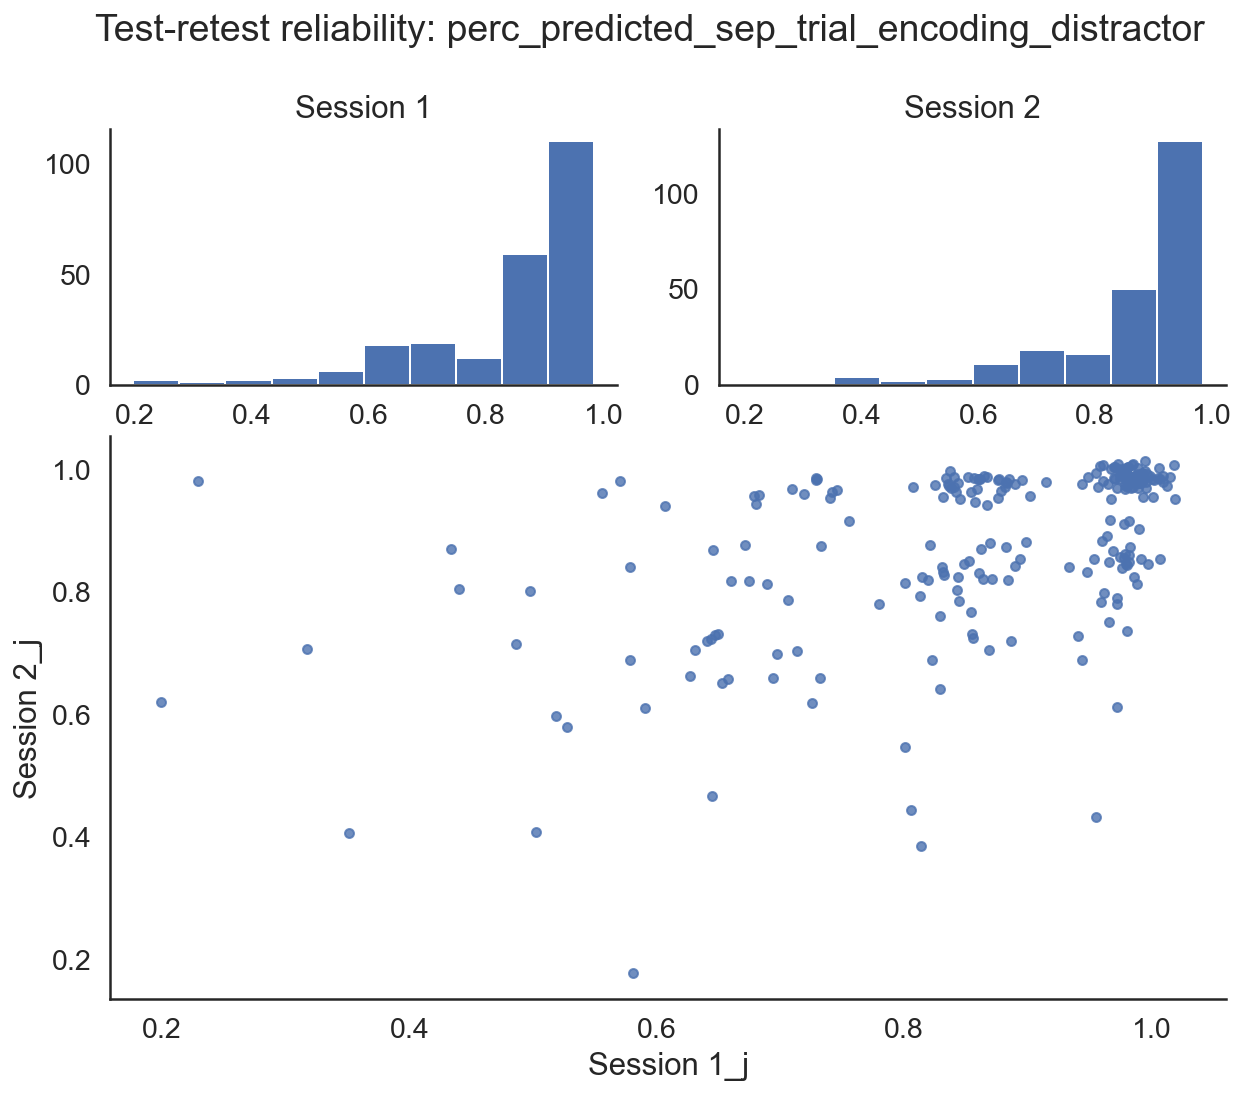

In [ ]:
perc_predicted_sep_trial_encoding_distractor = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_trial_encoding_distractor', add_jitter = True)

In [ ]:
iccs_perc_predicted_sep_trial_mod_encoding_distractor = get_model_calculated_icc(ms['encoding_distractor'])
iccs_perc_predicted_sep_trial_mod_encoding_distractor['icc']

0.4927010523631623

#### Delayed distractor

type    ICC      F    df1    df2    p  lower bound  \
Single_raters_absolute    ICC1  0.603  4.039  231.0  232.0  0.0        0.530   
Single_random_raters      ICC2  0.606  4.194  231.0  231.0  0.0        0.530   
Single_fixed_raters       ICC3  0.615  4.194  231.0  231.0  0.0        0.543   
Average_raters_absolute  ICC1k  0.752  4.039  231.0  232.0  0.0        0.693   
Average_random_raters    ICC2k  0.755  4.194  231.0  231.0  0.0        0.693   
Average_fixed_raters     ICC3k  0.762  4.194  231.0  231.0  0.0        0.704   

                         upper bound     description  
Single_raters_absolute         0.668  .60 (.53, .67)  
Single_random_raters           0.672  .61 (.53, .67)  
Single_fixed_raters            0.678  .61 (.54, .68)  
Average_raters_absolute        0.801  .75 (.69, .80)  
Average_random_raters          0.804  .75 (.69, .80)  
Average_fixed_raters           0.808  .76 (.70, .81)

variance  Percent
ID           0.015    0.606
Items        0.000    0.015
Residual     0.009    0.379
Total        0.025    1.000

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


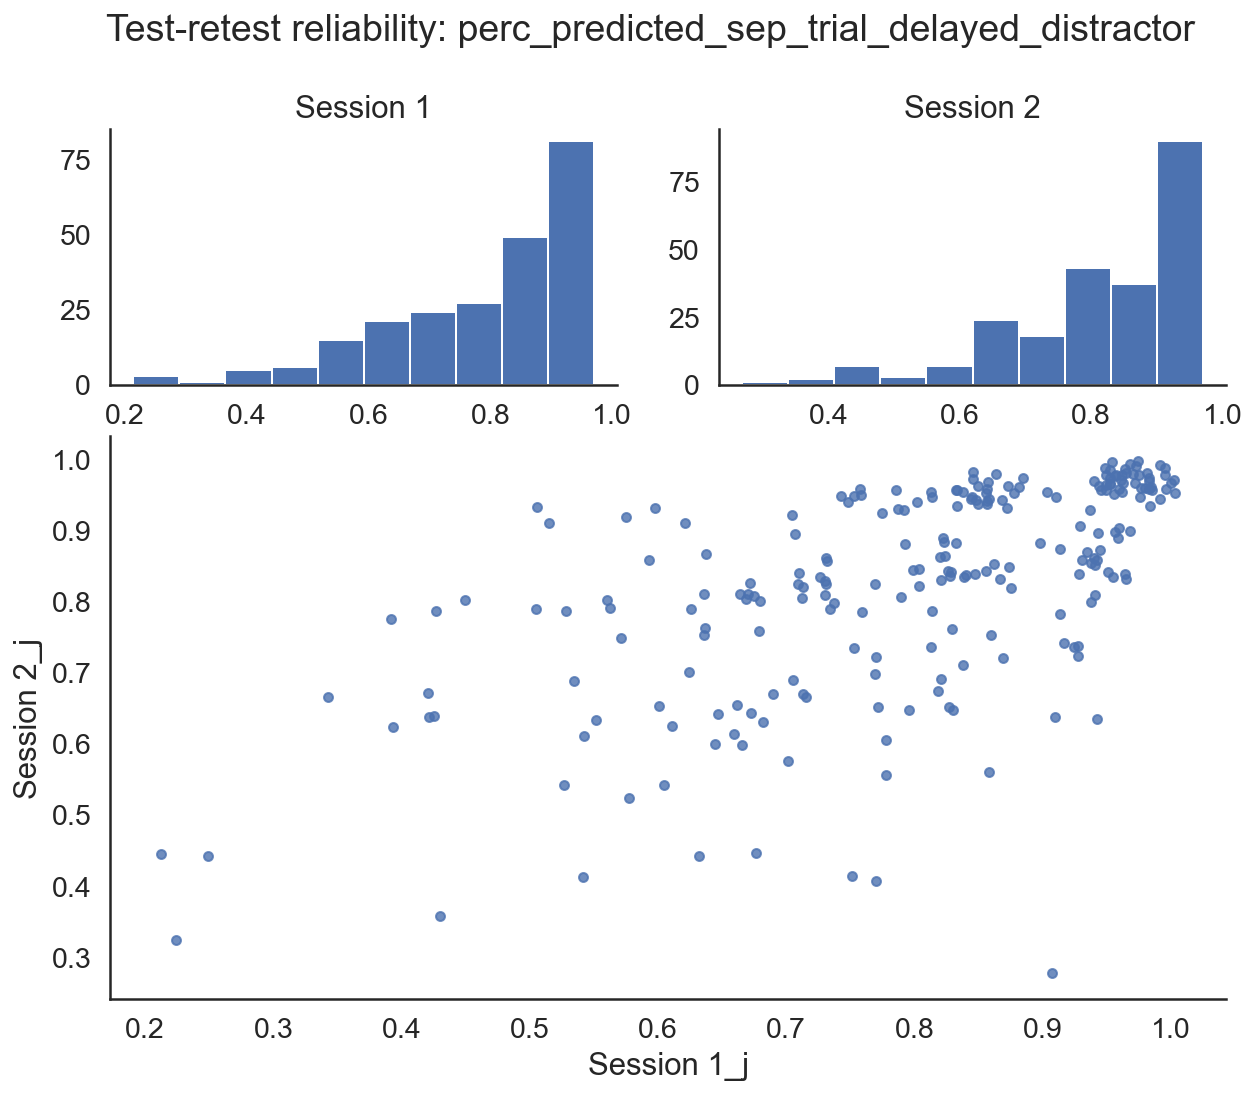

In [ ]:
perc_predicted_sep_trial_delayed_distractor = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_trial_delayed_distractor', add_jitter = True)

In [ ]:
iccs_perc_predicted_sep_trial_mod_delayed_distractor = get_model_calculated_icc(ms['delayed_distractor'])
iccs_perc_predicted_sep_trial_mod_delayed_distractor['icc']

0.5864239636888275

### Based on model-calculated variances

#### No distractor (long)

In [ ]:
iccs_perc_predicted_sep_trial_mod_no_distractor_1 = stats.get_model_calculated_icc(ms['no_distractor_1'])
iccs_perc_predicted_sep_trial_mod_no_distractor_1['icc']

0.5162815496790297

#### No distractor (short)

In [ ]:
iccs_perc_predicted_sep_trial_mod_no_distractor_2 = stats.get_model_calculated_icc(ms['no_distractor_2'])
iccs_perc_predicted_sep_trial_mod_no_distractor_2['icc']

0.540487829100631

#### Enconding distractor

In [ ]:
iccs_perc_predicted_sep_trial_mod_encoding_distractor = stats.get_model_calculated_icc(ms['encoding_distractor'])
iccs_perc_predicted_sep_trial_mod_encoding_distractor['icc']

0.4927010523631623

#### Delayed distractor

In [ ]:
iccs_perc_predicted_sep_trial_mod_delayed_distractor = stats.get_model_calculated_icc(ms['delayed_distractor'])
iccs_perc_predicted_sep_trial_mod_delayed_distractor['icc']

0.5864239636888275

## Comparison of methods

### All methods

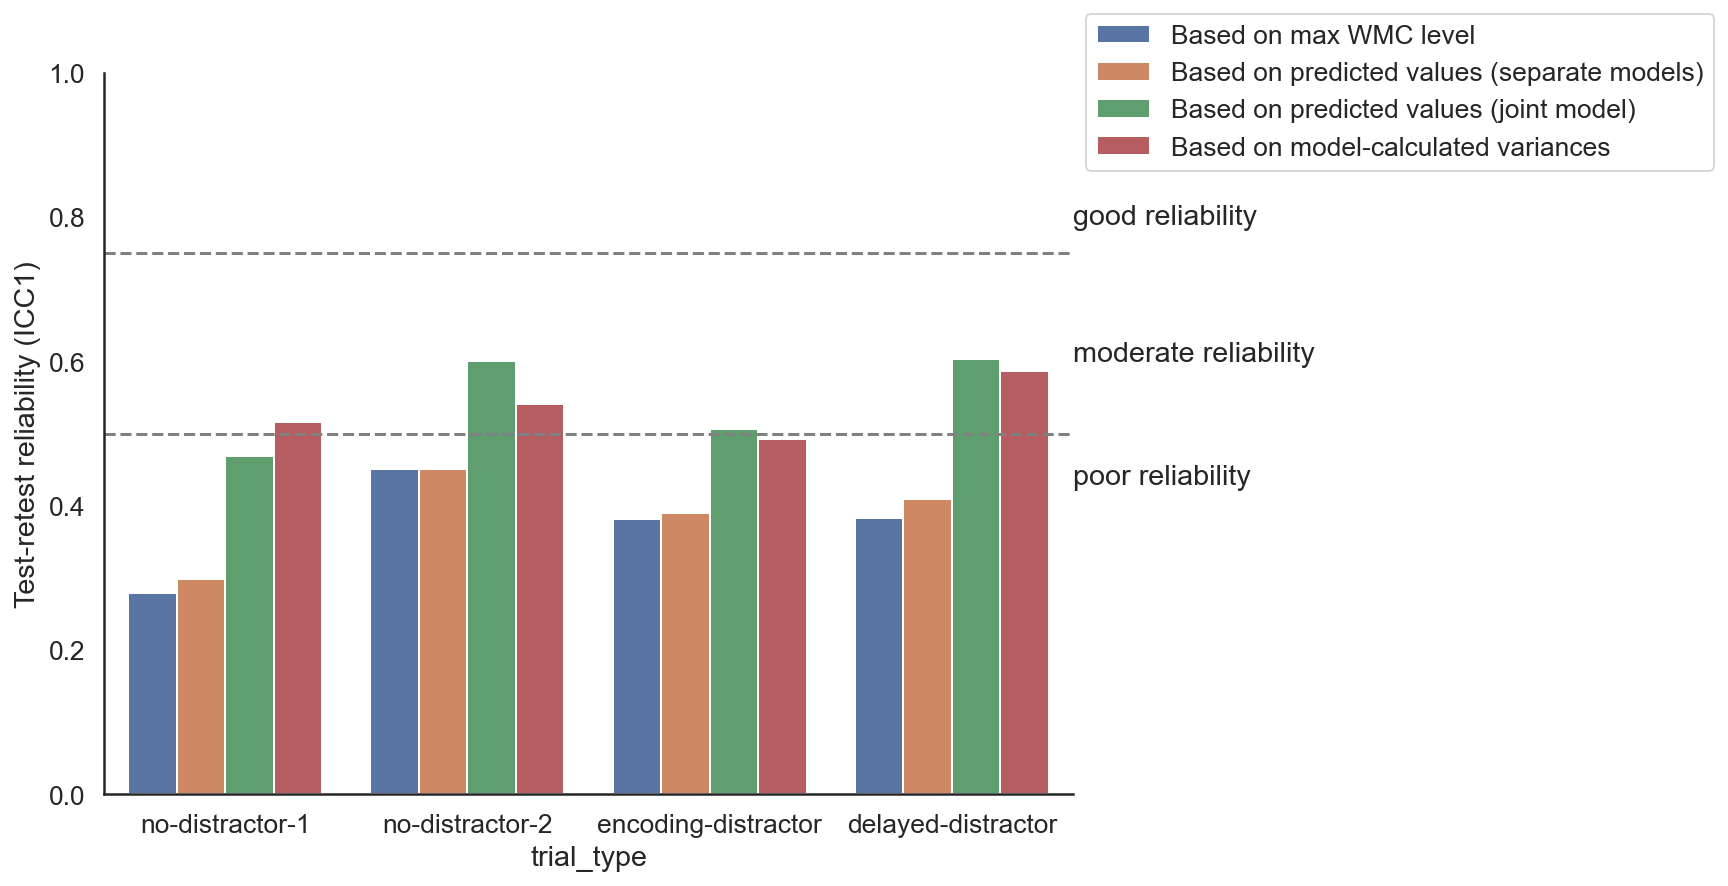

In [ ]:
iccs = {
    "Based on max WMC level_no-distractor-1": iccs_mean_no_distractor_1,
    "Based on max WMC level_no-distractor-2": iccs_mean_no_distractor_2,
    "Based on max WMC level_encoding-distractor": iccs_mean_encoding_distractor,
    "Based on max WMC level_delayed-distractor": iccs_mean_delayed_distractor,
    "trial_sep_no-distractor-1": iccs_perc_predicted_sep_no_distractor_1,
    "trial_sep_no-distractor-2": iccs_perc_predicted_sep_no_distractor_2,
    "trial_sep_encoding-distractor": perc_predicted_sep_encoding_distractor,
    "trial_sep_delayed-distractor": perc_predicted_sep_delayed_distractor,
    "trial_joint_no-distractor-1": iccs_perc_predicted_sep_trial_no_distractor_1,
    "trial_joint_no-distractor-2": iccs_perc_predicted_sep_trial_no_distractor_2,
    "trial_joint_encoding-distractor": perc_predicted_sep_trial_encoding_distractor,
    "trial_joint_delayed-distractor": perc_predicted_sep_trial_delayed_distractor,
    "model_calc_no-distractor-1": iccs_perc_predicted_sep_trial_mod_no_distractor_1,
    "model_calc_no-distractor-2": iccs_perc_predicted_sep_trial_mod_no_distractor_2,
    "model_calc_encoding-distractor": iccs_perc_predicted_sep_trial_mod_encoding_distractor,
    "model_calc_delayed-distractor": iccs_perc_predicted_sep_trial_mod_delayed_distractor  
}


g = plotting.icc_comparison_plot(iccs, aspect = 1.3,qualitative_labels = True, 
                        x_offset = 3.5, font_scale = 1.2)

### Selected methods for manuscript

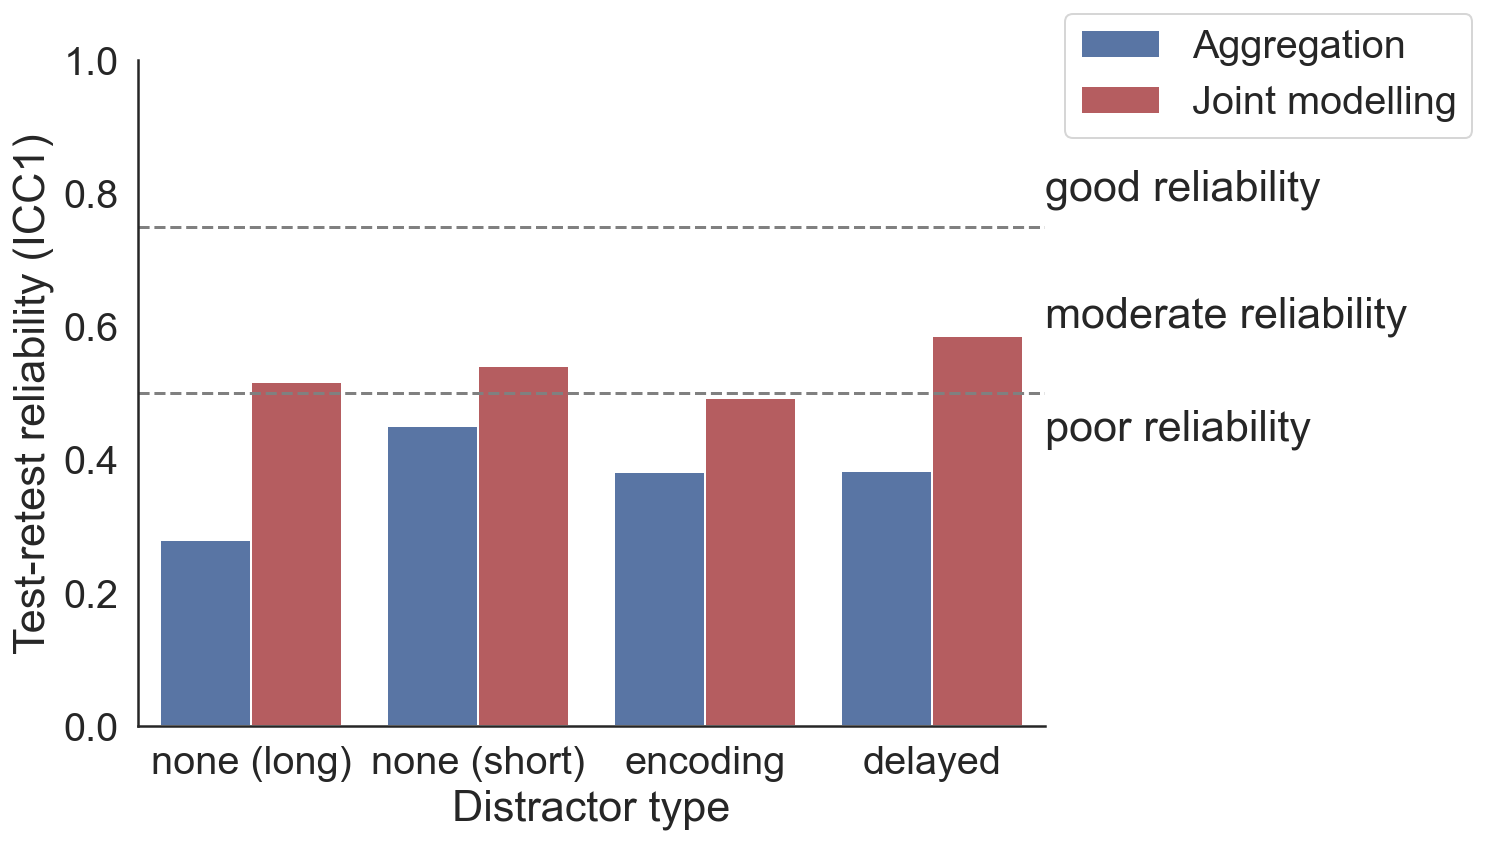

In [ ]:
iccs = {
    "Aggregation_none (long)": iccs_mean_no_distractor_1,
    "Joint modelling_none (long)": iccs_perc_predicted_sep_trial_mod_no_distractor_1,
    "Aggregation_none (short)": iccs_mean_no_distractor_2,
    "Joint modelling_none (short)": iccs_perc_predicted_sep_trial_mod_no_distractor_2,
    "Aggregation_encoding": iccs_mean_encoding_distractor,
    "Joint modelling_encoding": iccs_perc_predicted_sep_trial_mod_encoding_distractor, 
    "Aggregation_delayed": iccs_mean_delayed_distractor,
    "Joint modelling_delayed": iccs_perc_predicted_sep_trial_mod_delayed_distractor, 
}

palette=sns.color_palette([(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)])
g = plotting.icc_comparison_plot(iccs, 
                       
                       palette = palette,
                       aspect = 1.3,
                       qualitative_labels = True,
                       x_offset = 3.5,
                       font_scale = 1.8)

ax = g.axes[0][0]

ax.set_xlabel('Distractor type');


## Variance proportions

### No distractor (long)

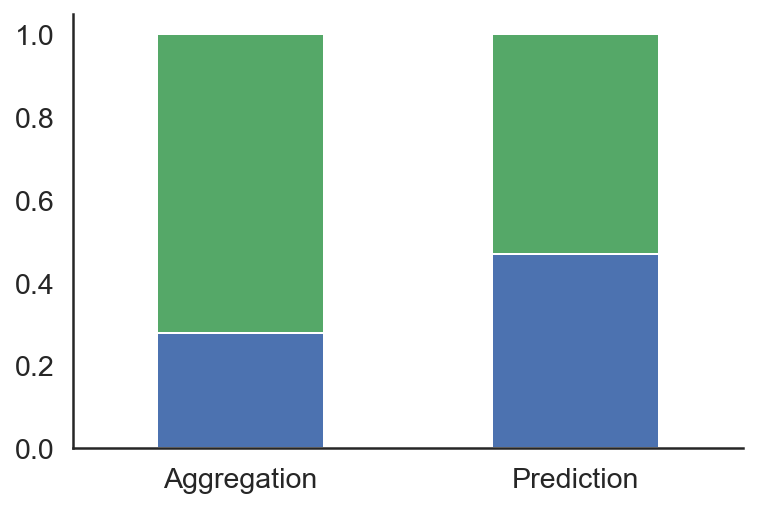

In [ ]:
ax = stats.var_comp_plot({'Aggregation':iccs_mean_no_distractor_1,'Prediction':iccs_perc_predicted_sep_trial_no_distractor_1})
ax.get_legend().remove()

### No distractor (short)

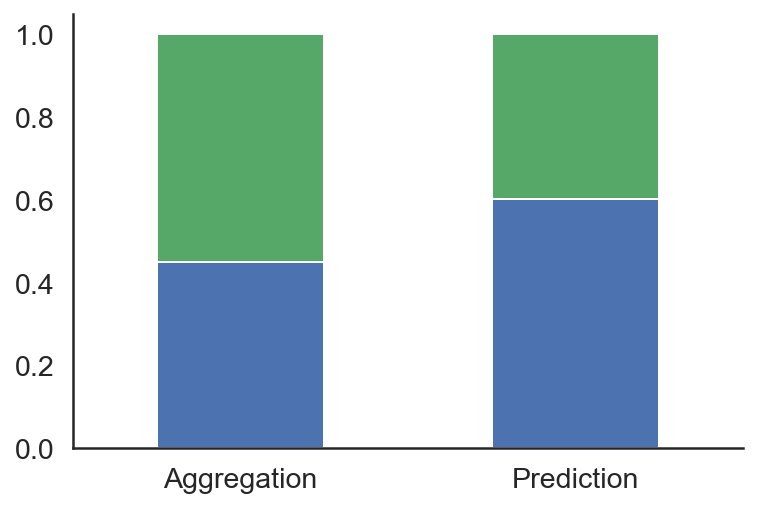

In [ ]:
ax = stats.var_comp_plot({'Aggregation':iccs_mean_no_distractor_2,'Prediction':iccs_perc_predicted_sep_trial_no_distractor_2})
ax.get_legend().remove()

### Encoding distractor

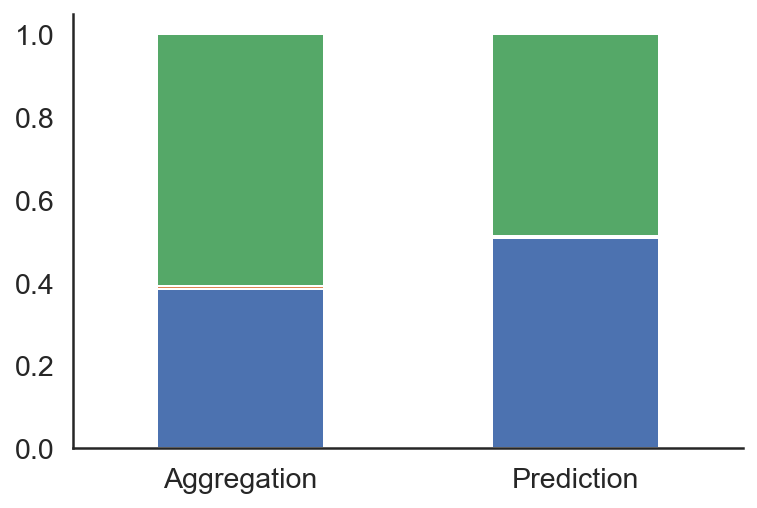

In [ ]:
ax = stats.var_comp_plot({'Aggregation':iccs_mean_encoding_distractor,'Prediction':perc_predicted_sep_trial_encoding_distractor})
ax.get_legend().remove()

### Delayed distractor

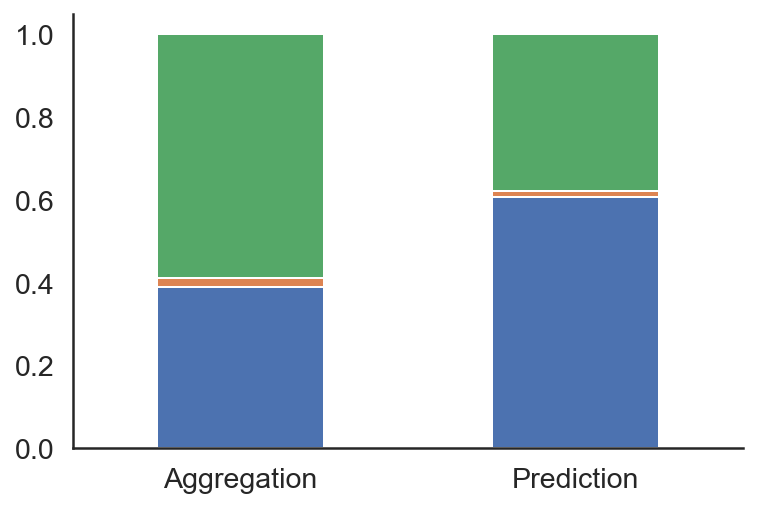

In [ ]:
ax = stats.var_comp_plot({'Aggregation':iccs_mean_delayed_distractor,'Prediction':perc_predicted_sep_trial_delayed_distractor})
ax.get_legend().remove()

## Effect of time

In [ ]:
scores = stats.get_scores(dp, dp.get_wm_data, wm_scoring.get_perc_correct_predicted_sep_trial)

### No distractor (long)

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 98


R[write to console]: boundary (singular) fit: see ?isSingular



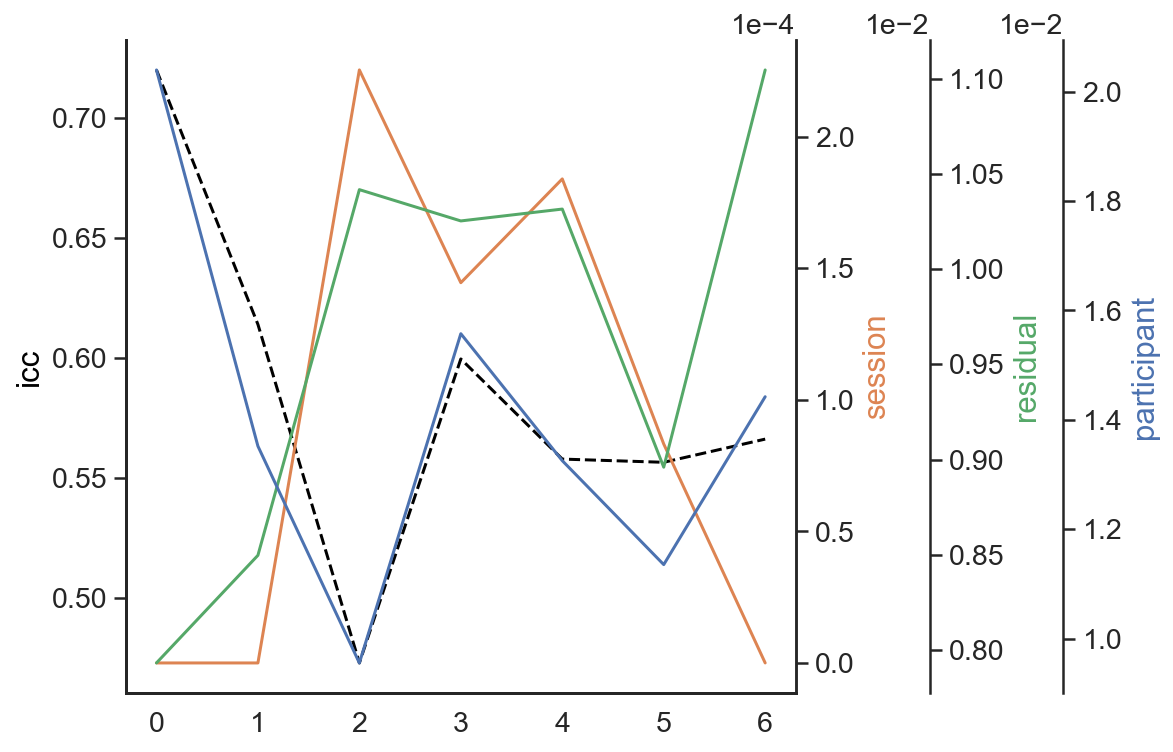

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_predicted_sep_trial_no_distractor_1", scaling = 'variance', change = False)
ax.figure.set_size_inches(6, 6)

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 98


R[write to console]: boundary (singular) fit: see ?isSingular



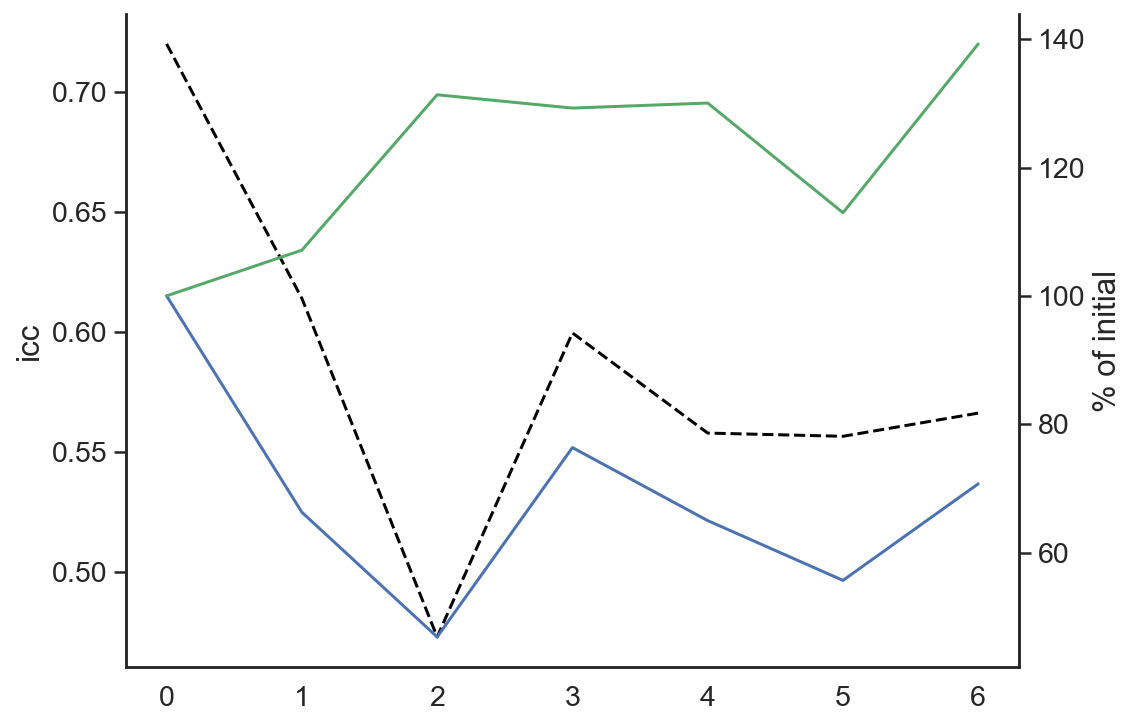

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_predicted_sep_trial_no_distractor_1", scaling = 'variance', change = True)
ax.figure.set_size_inches(8, 6)

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 98


R[write to console]: boundary (singular) fit: see ?isSingular



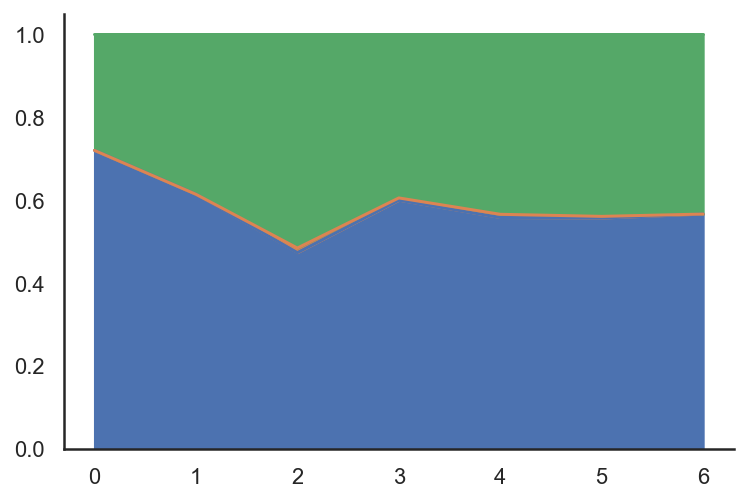

In [ ]:
stats.plot_time_effect(scores, 8, "perc_predicted_sep_trial_no_distractor_1")

### No distractor (short)

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 98


R[write to console]: boundary (singular) fit: see ?isSingular



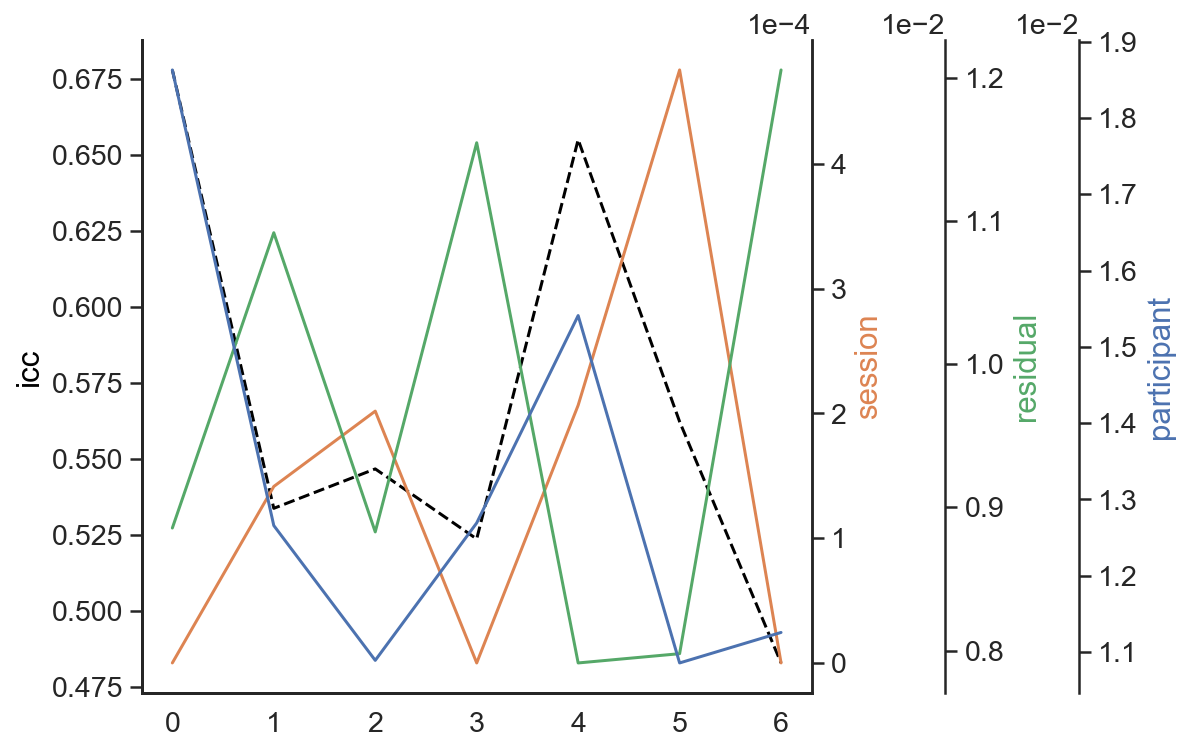

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_predicted_sep_trial_no_distractor_2", scaling = 'variance', change = False)
ax.figure.set_size_inches(6, 6)

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 98


R[write to console]: boundary (singular) fit: see ?isSingular



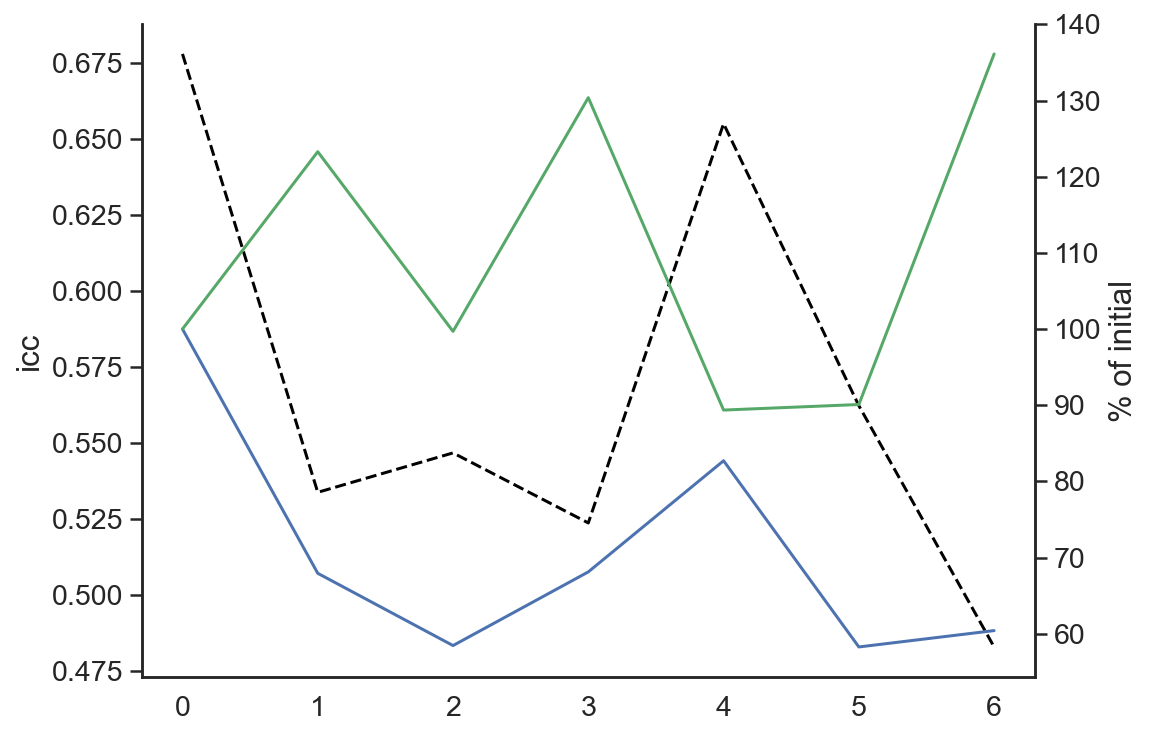

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_predicted_sep_trial_no_distractor_2", scaling = 'variance', change = True)
ax.figure.set_size_inches(8, 6)

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 98


R[write to console]: boundary (singular) fit: see ?isSingular



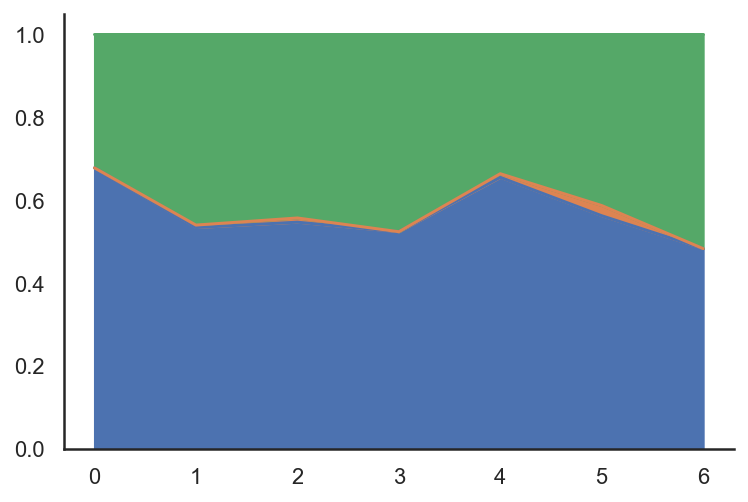

In [ ]:
stats.plot_time_effect(scores, 8, "perc_predicted_sep_trial_no_distractor_2")

### Encoding distractor

R[write to console]: boundary (singular) fit: see ?isSingular



N = 98


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



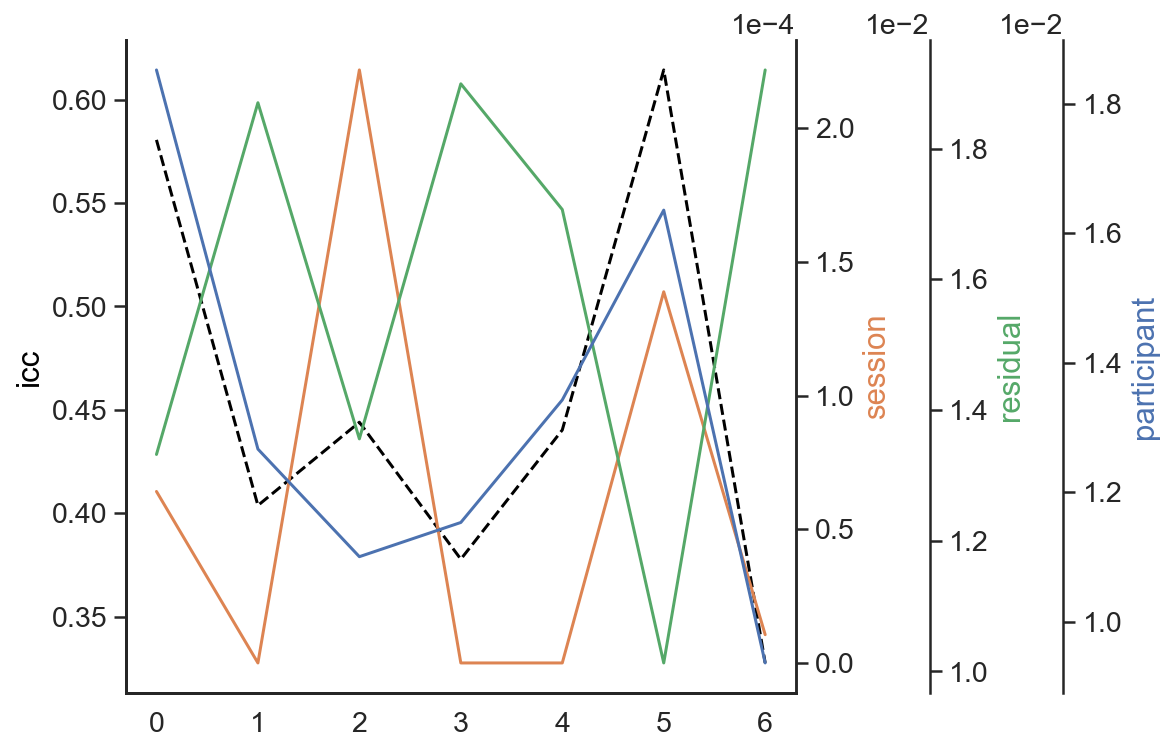

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_predicted_sep_trial_encoding_distractor", scaling = 'variance', change = False)
ax.figure.set_size_inches(6, 6)

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 98


R[write to console]: boundary (singular) fit: see ?isSingular



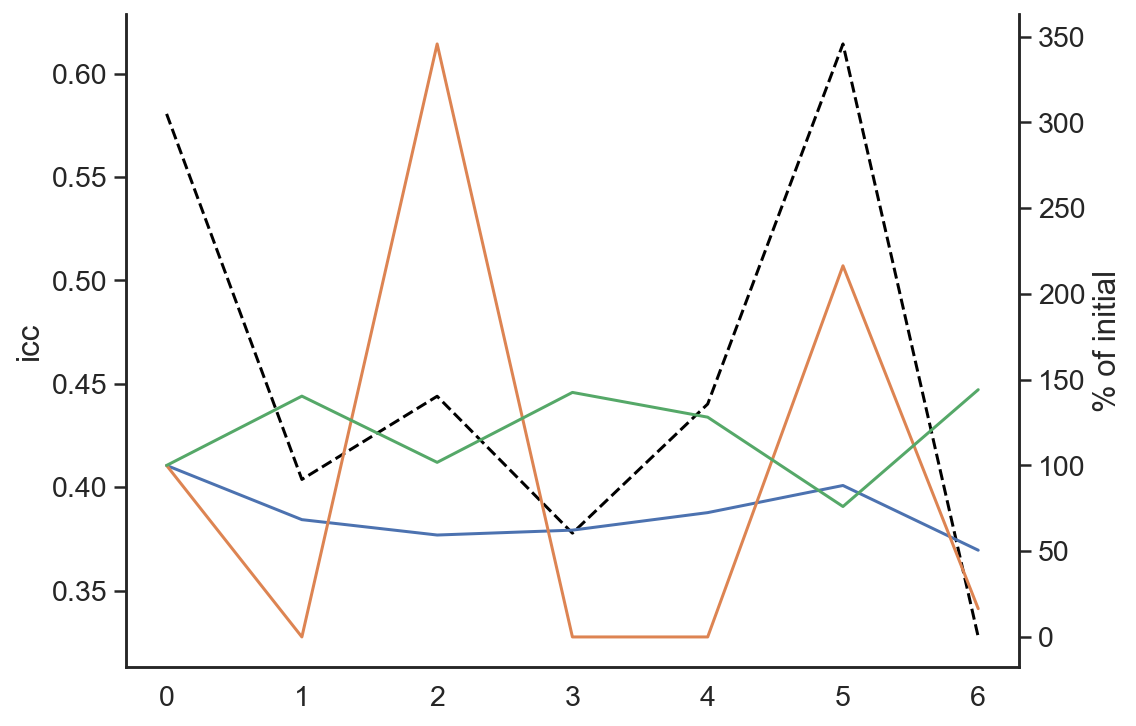

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_predicted_sep_trial_encoding_distractor", scaling = 'variance', change = True)
ax.figure.set_size_inches(8, 6)

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 98


R[write to console]: boundary (singular) fit: see ?isSingular



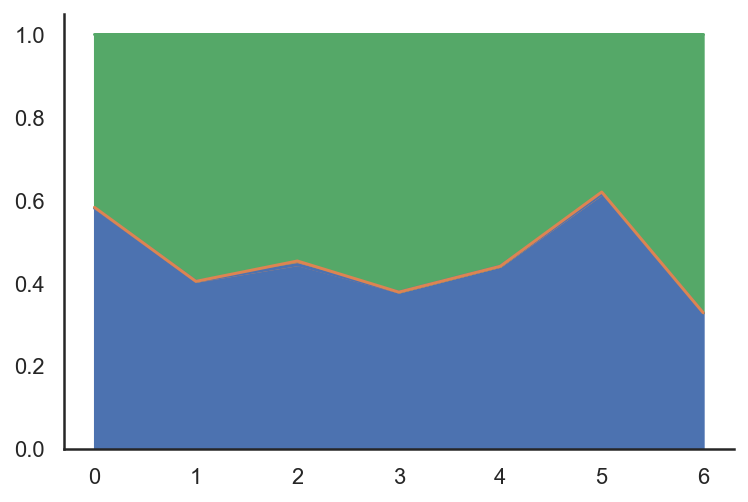

In [ ]:
stats.plot_time_effect(scores, 8, "perc_predicted_sep_trial_encoding_distractor")

### Delayed distractor

N = 98


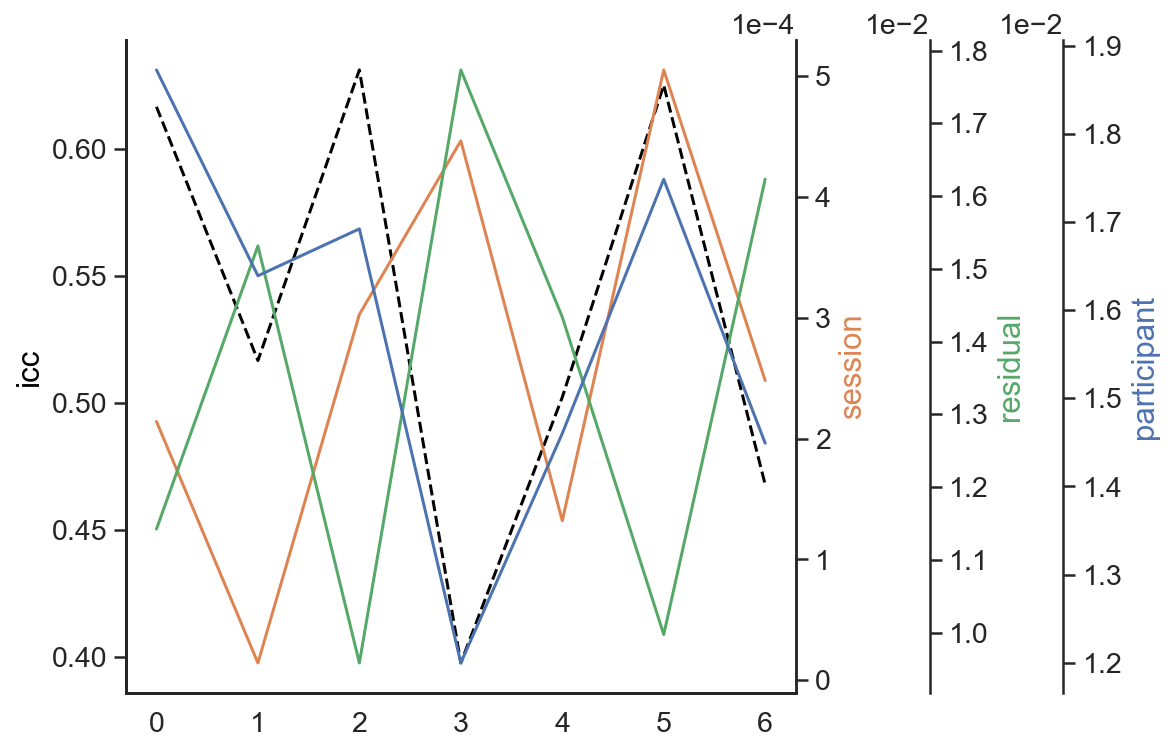

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_predicted_sep_trial_delayed_distractor", scaling = 'variance', change = False)
ax.figure.set_size_inches(6, 6)

N = 98


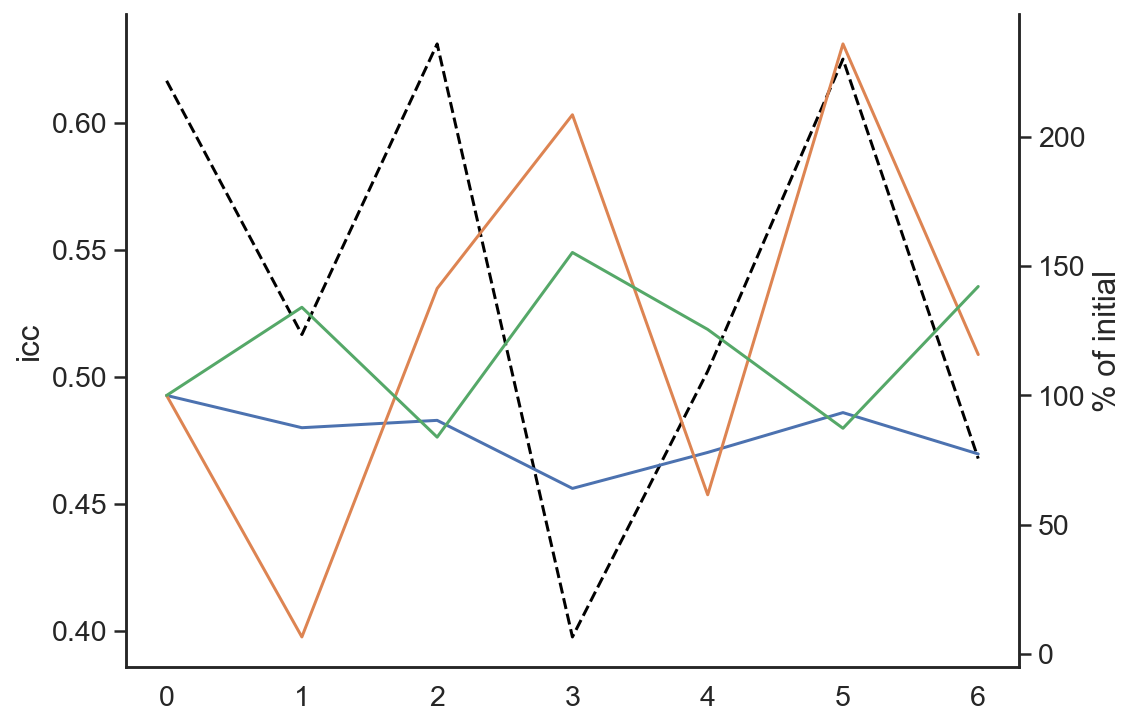

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_predicted_sep_trial_delayed_distractor", scaling = 'variance', change = True)
ax.figure.set_size_inches(8, 6)

N = 98


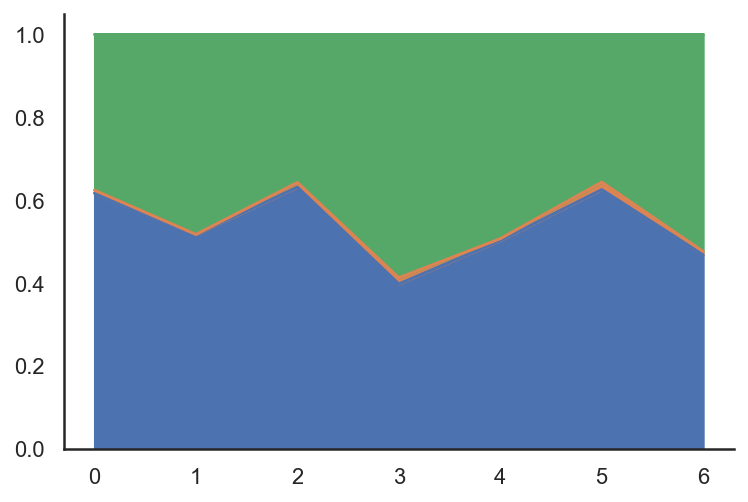

In [ ]:
stats.plot_time_effect(scores, 8, "perc_predicted_sep_trial_delayed_distractor")

## Effect of time (percentage change)

### No distractor (long)

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 98


R[write to console]: boundary (singular) fit: see ?isSingular



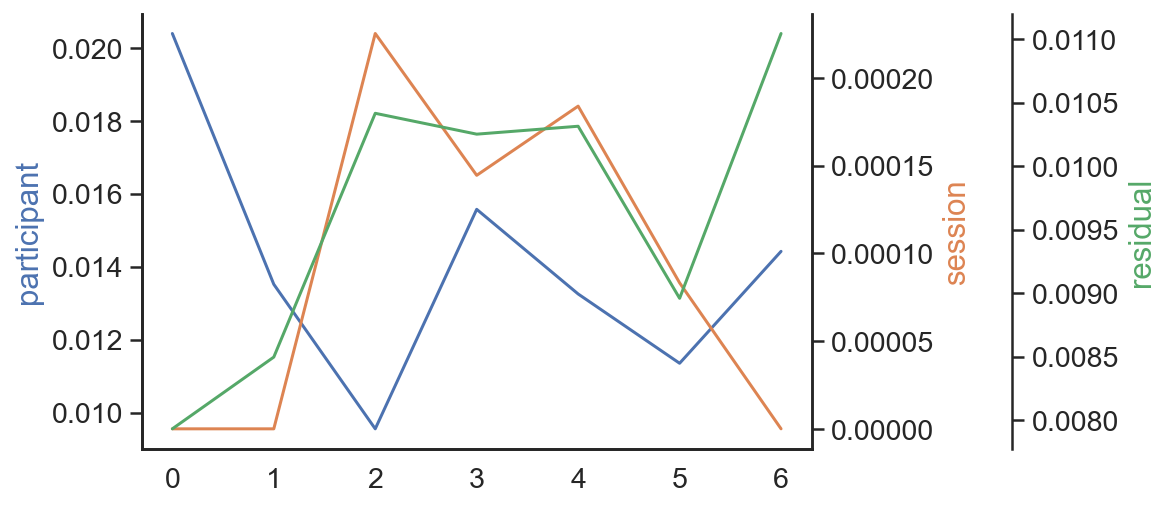

In [ ]:
stats.plot_time_effect(scores, 8, "perc_predicted_sep_trial_no_distractor_1", scaling = 'variance', change = False)

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 98


R[write to console]: boundary (singular) fit: see ?isSingular



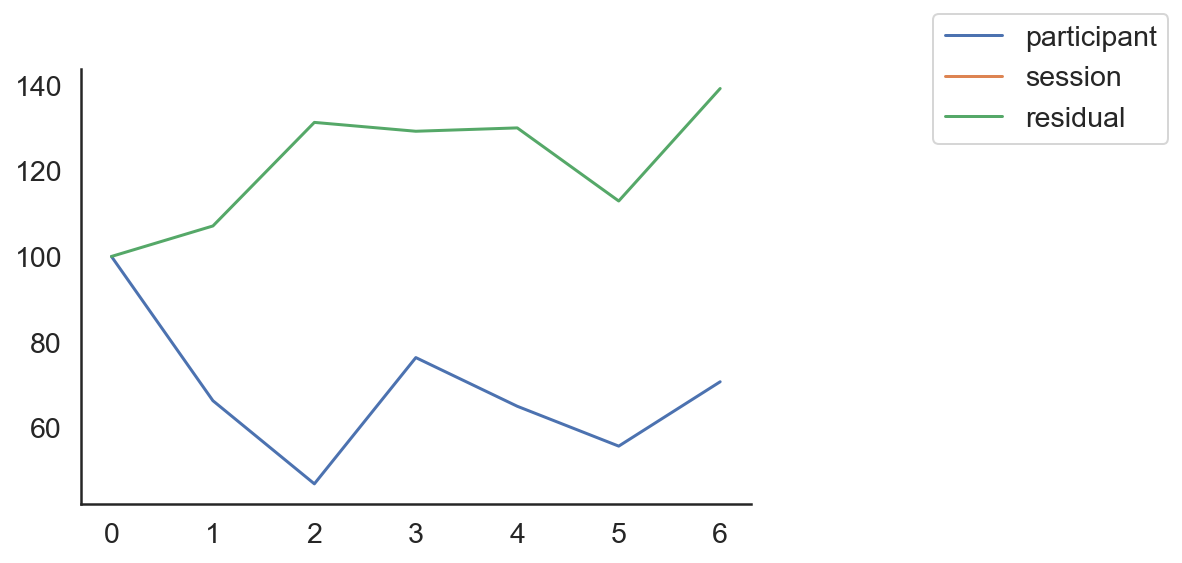

In [ ]:
plot_time_effect(scores, 8, "perc_predicted_sep_trial_no_distractor_1", scaling = 'variance', change = True)

Note that these scores have 0 session variance in session one, which breaks the other calculations.

### No distractor (short)

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 98


R[write to console]: boundary (singular) fit: see ?isSingular



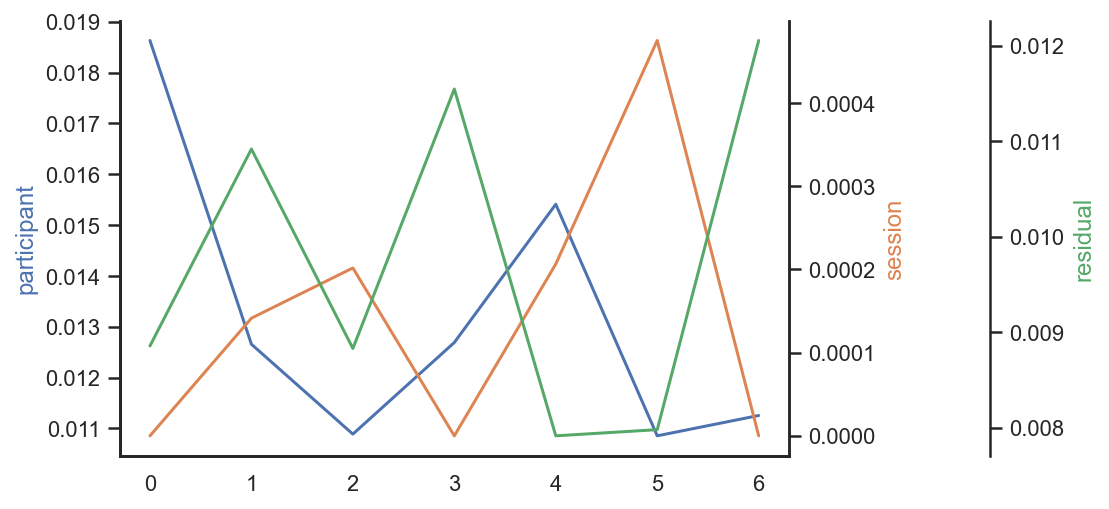

In [ ]:
plot_time_effect(scores, 8, "perc_predicted_sep_trial_no_distractor_2", scaling = 'variance', change = False)

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 98


R[write to console]: boundary (singular) fit: see ?isSingular



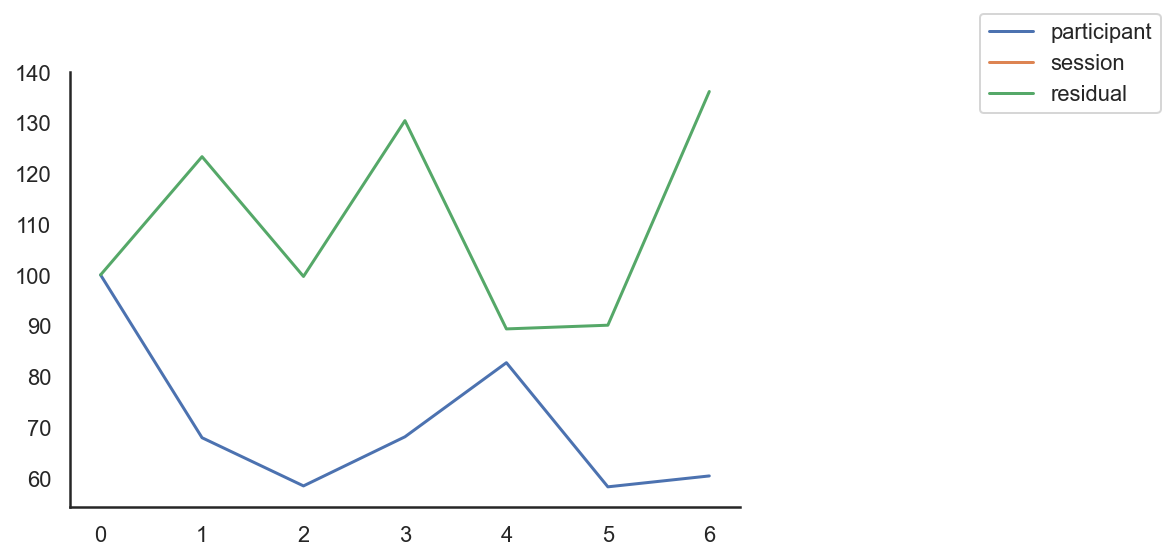

In [ ]:
plot_time_effect(scores, 8, "perc_predicted_sep_trial_no_distractor_2", scaling = 'variance', change = True)

### Encoding distractor

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 98


R[write to console]: boundary (singular) fit: see ?isSingular



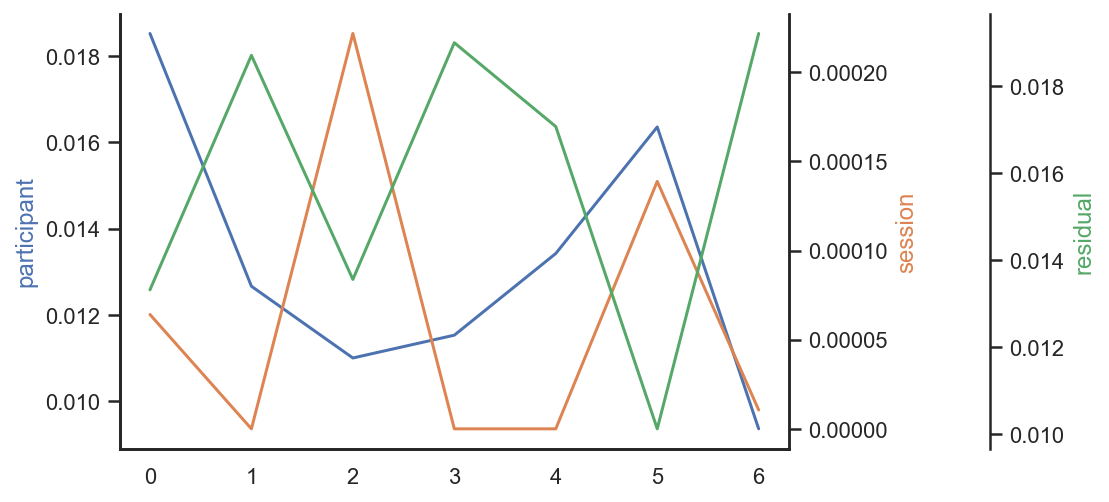

In [ ]:
plot_time_effect(scores, 8, "perc_predicted_sep_trial_encoding_distractor", scaling = 'variance', change = False)

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 98


R[write to console]: boundary (singular) fit: see ?isSingular



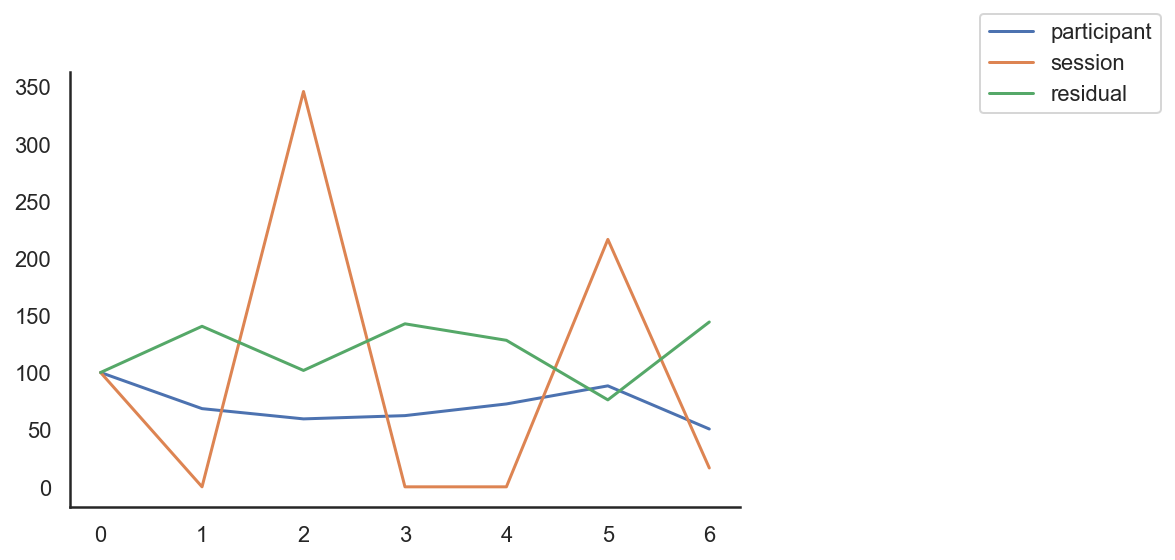

In [ ]:
plot_time_effect(scores, 8, "perc_predicted_sep_trial_encoding_distractor", scaling = 'variance', change = True)

### Delayed distractor

N = 98


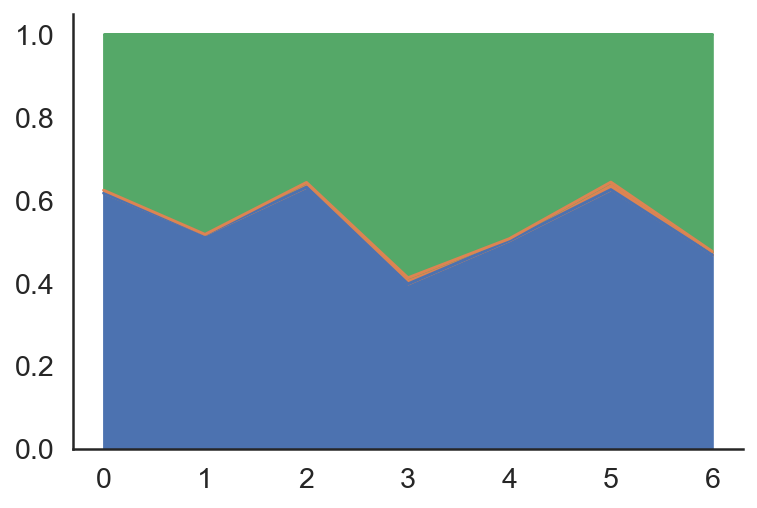

In [ ]:
stats.plot_time_effect_area(scores, 8, "perc_predicted_sep_trial_delayed_distractor")

N = 98


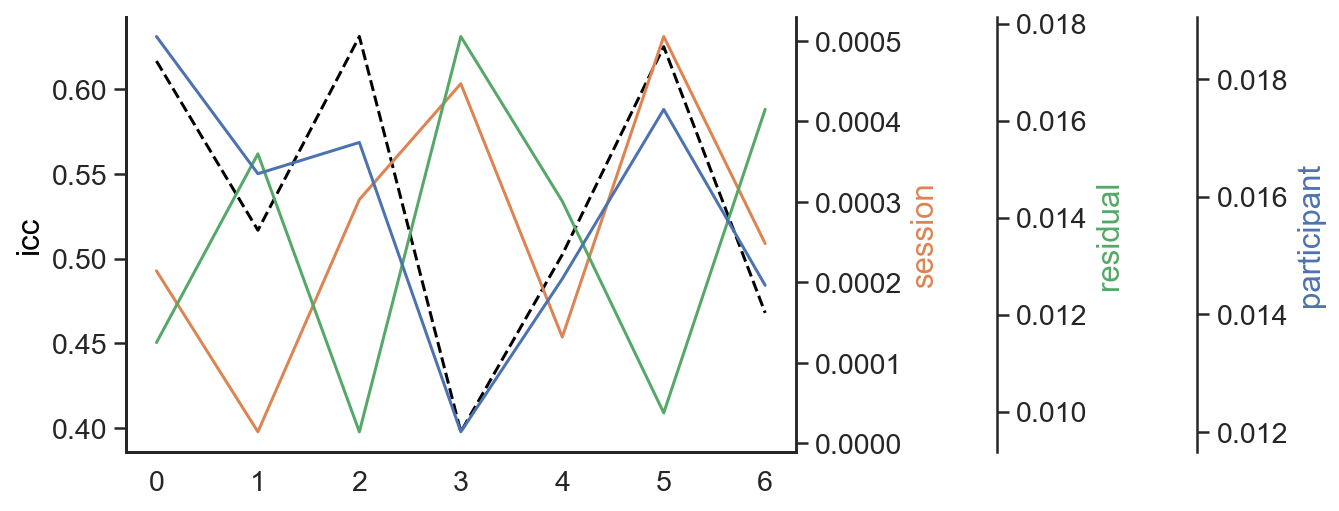

In [ ]:
def plot_time_effect(_df, sessions, dependent, legend = False, scaling = 'Percent', change = False):
    df = get_time_effect(_df, sessions, dependent, scaling)
    if change:
        df = (df/df.iloc[0])*100
        ax = df[['participant','session','residual']].plot(legend = legend)
        ax.figure.legend(bbox_to_anchor=[1.4, 1])
    else:
        ax = df.plot(y="icc", legend=False, color = 'black',linestyle = '--')
        ax.set_ylabel('icc', color = 'black')
        ax2 = ax.twinx()
        df.plot(y="session", ax=ax2, legend=False, color = sns.color_palette()[1])
        ax2.set_ylabel('session',color = sns.color_palette()[1])
        ax3 = ax.twinx()
        ax3.set_ylabel('residual',color = sns.color_palette()[2])
        ax3.spines["right"].set_position(("axes", 1.3))
        df.plot(y="residual", ax=ax3, legend=False, color = sns.color_palette()[2])
        ax4 = ax.twinx()
        ax4.set_ylabel('participant',color = sns.color_palette()[0])
        df.plot(y="participant", ax=ax4, legend=False, color = sns.color_palette()[0])
        ax4.spines["right"].set_position(("axes", 1.6))
        sns.despine(right=False)
    ax.xaxis.get_major_locator().set_params(integer=True)
plot_time_effect(scores, 8, "perc_predicted_sep_trial_delayed_distractor", scaling = 'variance', change = False)

N = 98


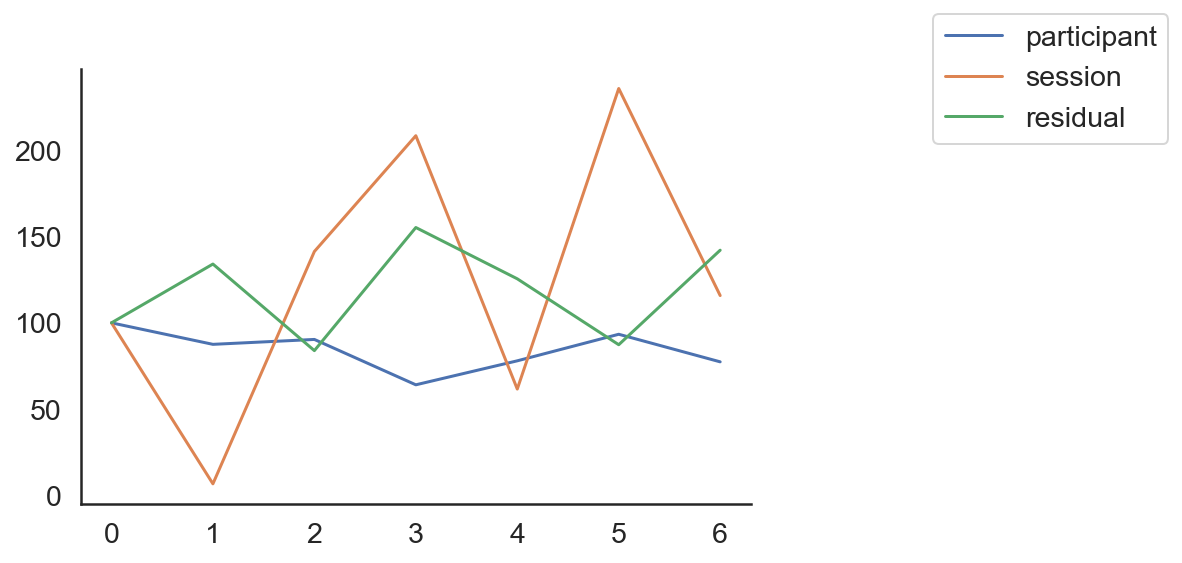

In [ ]:
plot_time_effect(scores, 8, "perc_predicted_sep_trial_delayed_distractor", scaling = 'variance', change = True)